In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Skip 'Load data' and 'Window Segmentation + Add statistical features'

- They are used to generated 'combined_data.csv' which is already stored in the `/data` directory.
- Read that df directly before EDA.

## Load data

In [ ]:
csv_filenames = os.listdir('../data/raw')

In [4]:
csv_filenames.sort()

load data from individual subjects and combine them

In [6]:
df = pd.DataFrame()
i=1
for filename in csv_filenames:
    df_temp = pd.read_csv('../data/subject_level_data/'+filename)
    df_temp['filename'] = [filename.split('.')[0] for x in range(len(df_temp))]
    df_temp['subject_id'] = [i for x in range(len(df_temp))]
    df = pd.concat([df, df_temp], ignore_index=True)
    i+=1

In [7]:
df = df.drop(['index', 'Unnamed: 0'], axis=1)
df

timestamp    back_x    back_y    back_z   thigh_x  \
0        2019-01-12 00:00:00.000 -0.760242  0.299570  0.468570 -5.092732   
1        2019-01-12 00:00:00.010 -0.530138  0.281880  0.319987  0.900547   
2        2019-01-12 00:00:00.020 -1.170922  0.186353 -0.167010 -0.035442   
3        2019-01-12 00:00:00.030 -0.648772  0.016579 -0.054284 -1.554248   
4        2019-01-12 00:00:00.040 -0.355071 -0.051831 -0.113419 -0.547471   
...                          ...       ...       ...       ...       ...   
6461323  2019-01-12 00:59:56.940 -1.012939 -0.110840 -0.218994 -0.970215   
6461324  2019-01-12 00:59:56.960 -0.979492 -0.089355 -0.216553 -0.966553   
6461325  2019-01-12 00:59:56.980 -0.969971 -0.057861 -0.204590 -0.997803   
6461326  2019-01-12 00:59:57.000 -1.001953 -0.029785 -0.234863 -1.000000   
6461327  2019-01-12 00:59:57.020 -1.015381 -0.030762 -0.218262 -1.000244   

          thigh_y   thigh_z  label filename  subject_id  
0       -0.298644  0.709439      6     S006           1  
1        0.286944  0.340309      6     S006           1  
2       -0.078423 -0.515212      6     S006           1  
3       -0.950978 -0.221140      6     S006           1  
4        0.140903 -0.653782      6     S006           1  
...           ...       ...    ...      ...         ...  
6461323 -0.313232  0.124268      3     S029          22  
6461324 -0.234619  0.113770      3     S029          22  
6461325 -0.097656  0.065186      3     S029          22  
6461326 -0.145996  0.061523      3     S029          22  
6461327 -0.305420  0.076904      3     S029          22  

[6461328 rows x 10 columns]

In [8]:
df.columns

Index(['timestamp', 'back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y',
       'thigh_z', 'label', 'filename', 'subject_id'],
      dtype='object')

In [ ]:
# rearrange columns
df = df[['filename', 'subject_id', 'timestamp', 'back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label']]
df

filename  subject_id                timestamp    back_x    back_y  \
0           S006           1  2019-01-12 00:00:00.000 -0.760242  0.299570   
1           S006           1  2019-01-12 00:00:00.010 -0.530138  0.281880   
2           S006           1  2019-01-12 00:00:00.020 -1.170922  0.186353   
3           S006           1  2019-01-12 00:00:00.030 -0.648772  0.016579   
4           S006           1  2019-01-12 00:00:00.040 -0.355071 -0.051831   
...          ...         ...                      ...       ...       ...   
6461323     S029          22  2019-01-12 00:59:56.940 -1.012939 -0.110840   
6461324     S029          22  2019-01-12 00:59:56.960 -0.979492 -0.089355   
6461325     S029          22  2019-01-12 00:59:56.980 -0.969971 -0.057861   
6461326     S029          22  2019-01-12 00:59:57.000 -1.001953 -0.029785   
6461327     S029          22  2019-01-12 00:59:57.020 -1.015381 -0.030762   

           back_z   thigh_x   thigh_y   thigh_z  label  
0        0.468570 -5.092732 -0.298644  0.709439      6  
1        0.319987  0.900547  0.286944  0.340309      6  
2       -0.167010 -0.035442 -0.078423 -0.515212      6  
3       -0.054284 -1.554248 -0.950978 -0.221140      6  
4       -0.113419 -0.547471  0.140903 -0.653782      6  
...           ...       ...       ...       ...    ...  
6461323 -0.218994 -0.970215 -0.313232  0.124268      3  
6461324 -0.216553 -0.966553 -0.234619  0.113770      3  
6461325 -0.204590 -0.997803 -0.097656  0.065186      3  
6461326 -0.234863 -1.000000 -0.145996  0.061523      3  
6461327 -0.218262 -1.000244 -0.305420  0.076904      3  

[6461328 rows x 10 columns]

In [10]:
df.isnull().sum()

filename      0
subject_id    0
timestamp     0
back_x        0
back_y        0
back_z        0
thigh_x       0
thigh_y       0
thigh_z       0
label         0
dtype: int64

In [11]:
activity_mapping = {
    1: 'walking', 
    3: 'walking',  # Merging shuffling into walking
    2: 'running',
    4: 'stairs', 
    5: 'stairs',  # Merging both stair activities
    6: 'inactive',
    7: 'inactive',
    8: 'inactive',  # Merging standing, sitting, lying into inactive
    13: 'cycling',
    14: 'cycling',
    130: 'cycling',
    140: 'cycling'  # Merging all cycling activities into one
}

df['label'] = df['label'].replace(activity_mapping)

In [12]:
df.round(3).head(20).to_csv('ppt_data.csv')

In [13]:
df.dtypes

filename       object
subject_id      int64
timestamp      object
back_x        float64
back_y        float64
back_z        float64
thigh_x       float64
thigh_y       float64
thigh_z       float64
label          object
dtype: object

In [ ]:
# convert dtype of this column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [15]:
df.dtypes

filename              object
subject_id             int64
timestamp     datetime64[ns]
back_x               float64
back_y               float64
back_z               float64
thigh_x              float64
thigh_y              float64
thigh_z              float64
label                 object
dtype: object

#### How the back_x varies over time across different activities?

In [16]:
df[df['subject_id'] == 11].reset_index(drop=True)

filename  subject_id               timestamp    back_x    back_y  \
0          S018          11 2000-01-01 00:00:00.000 -0.918728  0.067922   
1          S018          11 2000-01-01 00:00:00.020 -1.051151  0.039049   
2          S018          11 2000-01-01 00:00:00.040 -0.969650  0.034035   
3          S018          11 2000-01-01 00:00:00.060 -1.012910  0.062894   
4          S018          11 2000-01-01 00:00:00.080 -0.942603  0.073996   
...         ...         ...                     ...       ...       ...   
322266     S018          11 2000-01-01 01:55:19.440 -0.765901  0.162646   
322267     S018          11 2000-01-01 01:55:19.460 -0.736058  0.149592   
322268     S018          11 2000-01-01 01:55:19.480 -0.764288  0.164324   
322269     S018          11 2000-01-01 01:55:19.500 -0.747560  0.147163   
322270     S018          11 2000-01-01 01:55:19.520 -0.763160  0.169320   

          back_z   thigh_x   thigh_y   thigh_z     label  
0      -0.184071 -0.772408 -0.028378  0.118989  inactive  
1       0.007468 -1.114042 -0.116003 -0.250463  inactive  
2      -0.062201 -0.945108 -0.030791 -0.142265  inactive  
3      -0.045062 -1.048248 -0.046655 -0.175566  inactive  
4      -0.065859 -0.919333 -0.061030 -0.144215  inactive  
...          ...       ...       ...       ...       ...  
322266 -0.650885 -0.122737 -0.016955  1.019202  inactive  
322267 -0.621919 -0.108383 -0.003984  0.964481  inactive  
322268 -0.657766 -0.116110 -0.016906  1.031401  inactive  
322269 -0.606997 -0.122406 -0.004608  0.945271  inactive  
322270 -0.691691 -0.080595 -0.014195  1.088618  inactive  

[322271 rows x 10 columns]

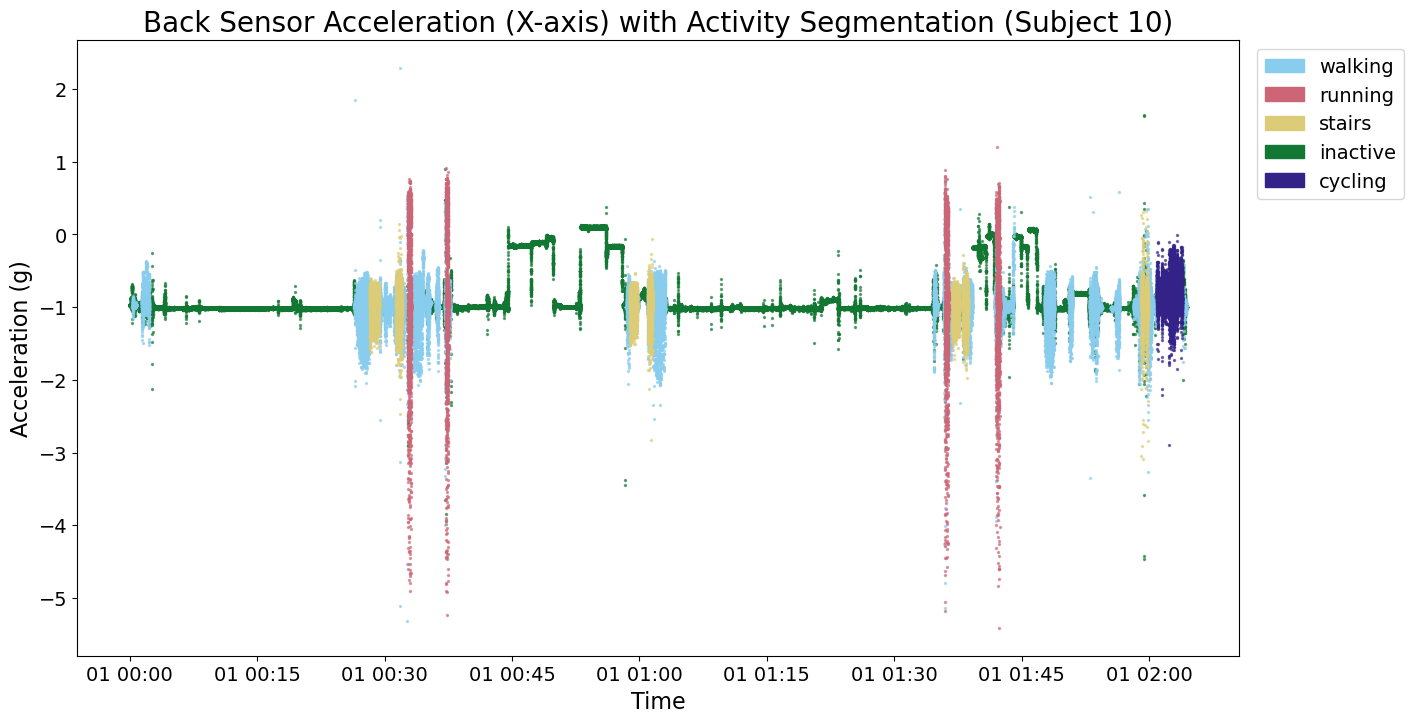

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


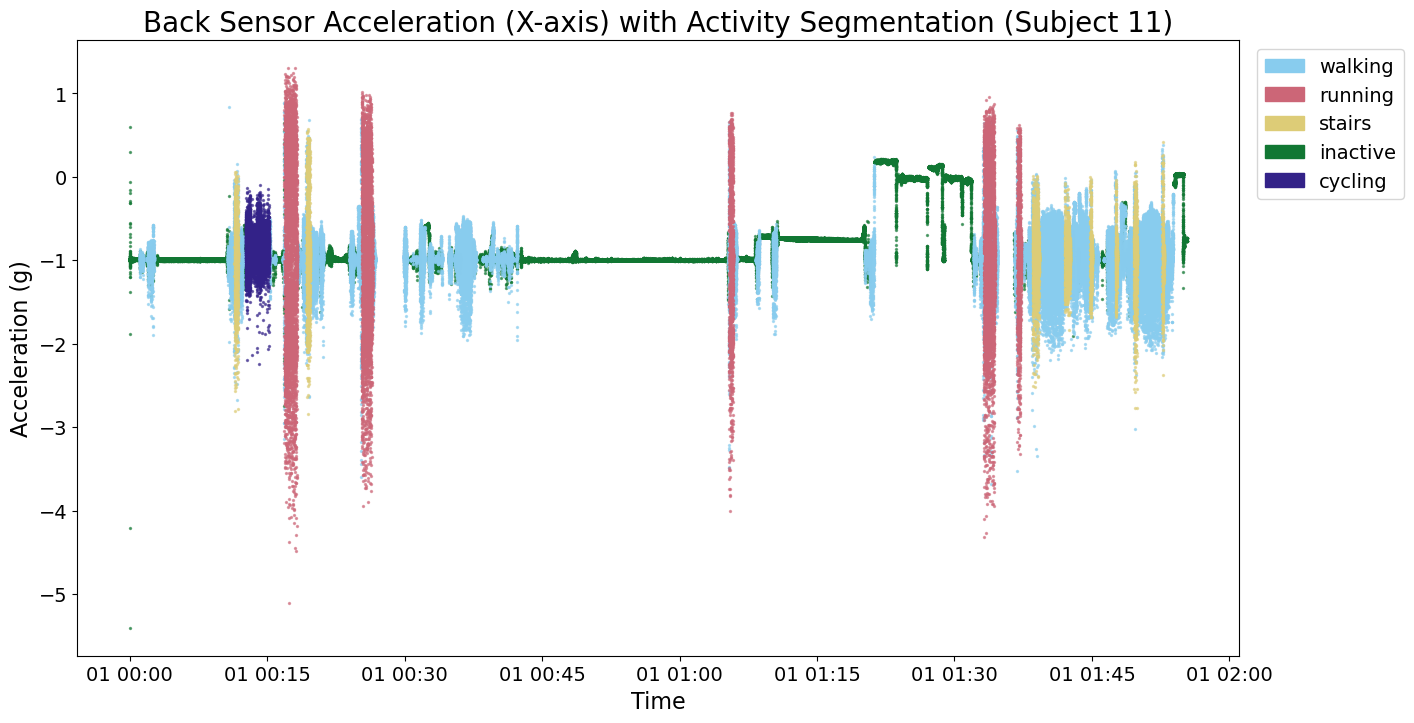

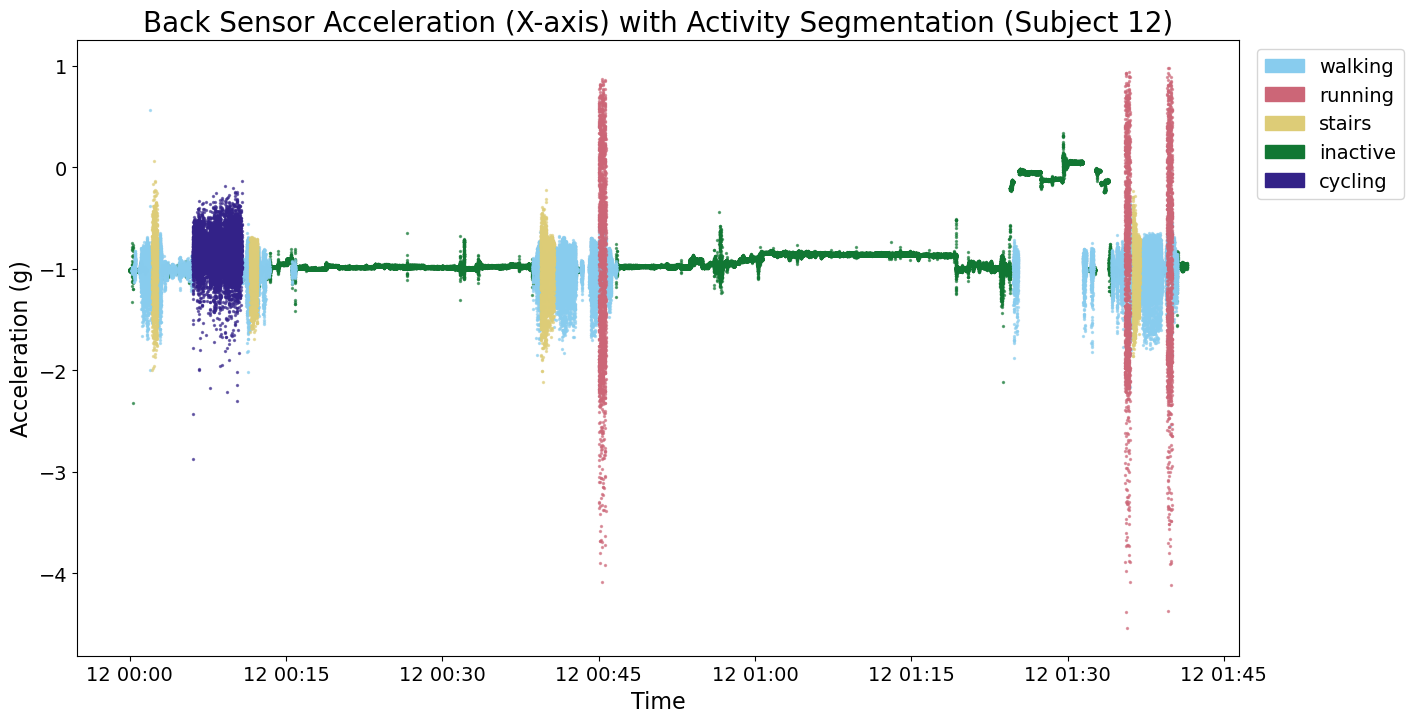

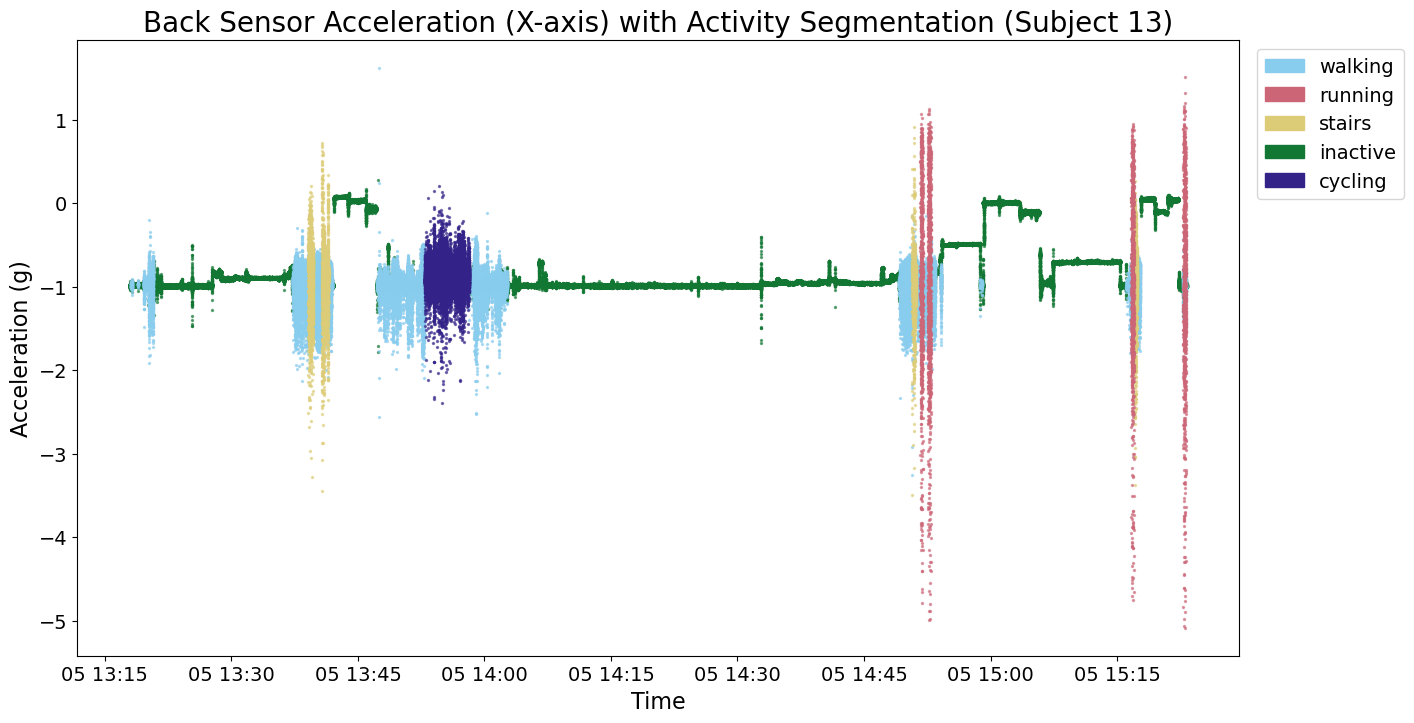

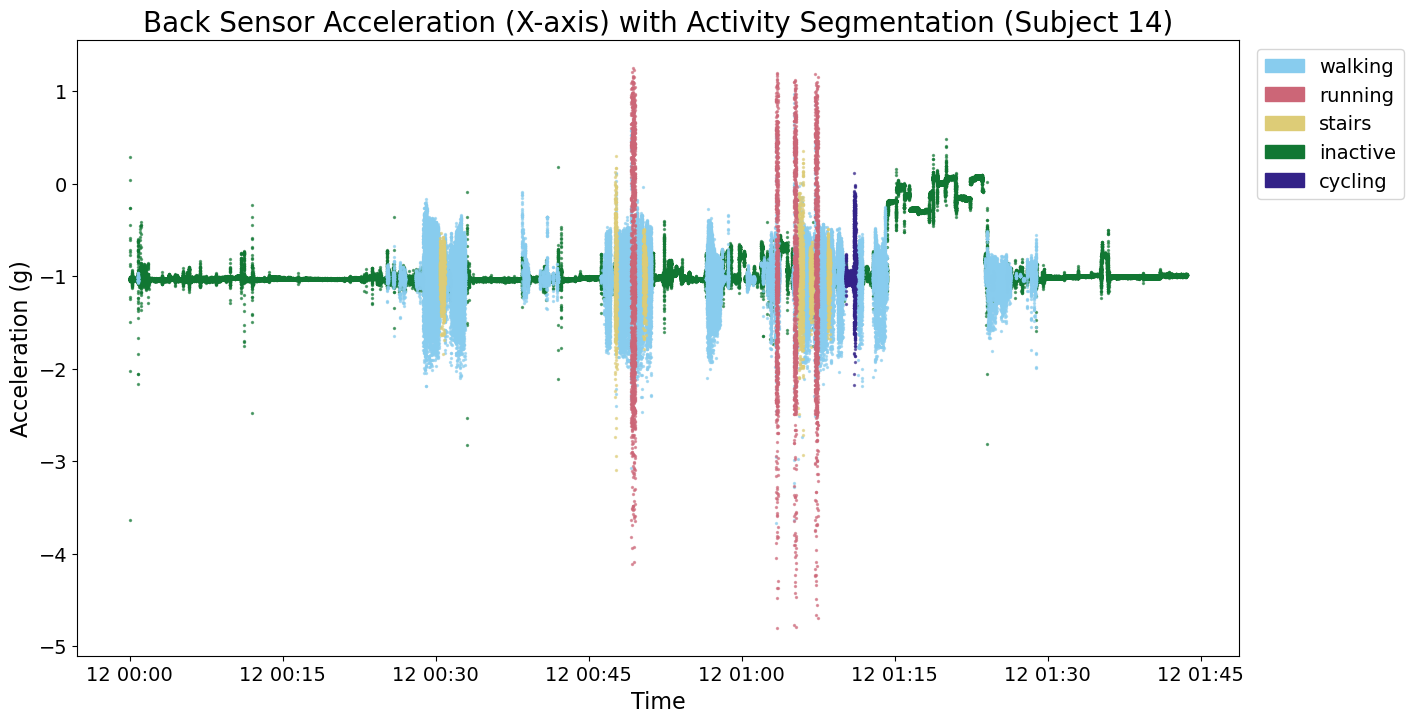

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

for subj_id in np.arange(22)[10:15]:         # Plot data for the first 3 subjects
    subject_df = df[df['subject_id'] == subj_id]

    activity_colors = {
        'walking': '#88CCEE',  # Light Blue
        'running': '#CC6677',  # Red
        'stairs': '#DDCC77',   # Yellow
        'inactive': '#117733', # Green
        'cycling': '#332288',  # Navy Blue
    }

    plt.figure(figsize=(15, 8))

    for activity in subject_df['label'].unique():
        activity_data = subject_df[subject_df['label'] == activity]
        plt.scatter(
            activity_data['timestamp'], activity_data['back_x'], 
            color=activity_colors[activity], label=f'{activity} (x)', alpha=0.6, s=2
        )

    handles = [mpatches.Patch(color=color, label=activity) for activity, color in activity_colors.items()]
    plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.15, 1), fontsize=14)

    plt.title(f'Back Sensor Acceleration (X-axis) with Activity Segmentation (Subject {subj_id})', fontsize=20)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel('Acceleration (g)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    if subj_id == 11:
        plt.savefig("../figures/eda_backx_subjID11.eps", dpi=300, bbox_inches='tight')
    plt.show()

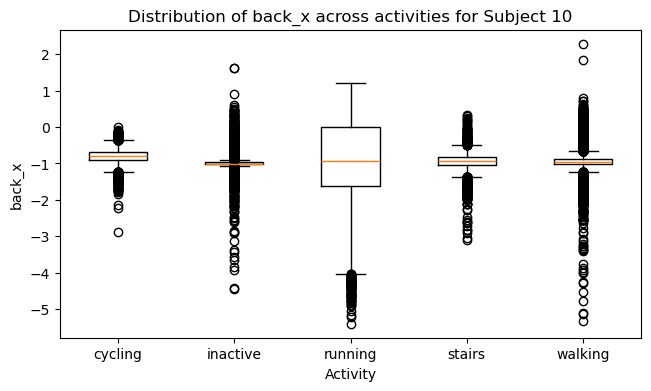

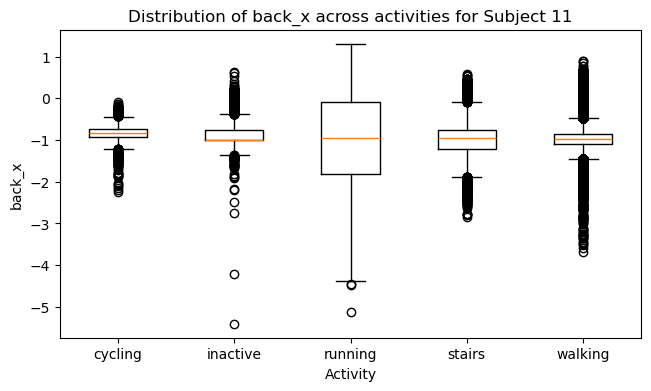

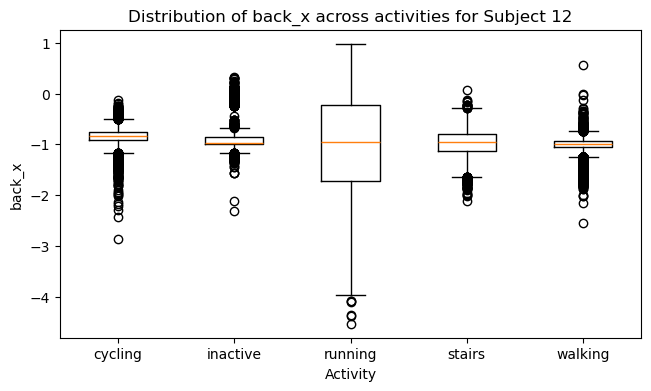

In [20]:
for subj_id in np.arange(22)[10:15]:          # Plot data for the first 3 subjects
    data = df[df['subject_id'] == subj_id]
    grouped_data = [data[data['label'] == label]['back_x'] for label in np.unique(df['label'])]

    plt.figure(figsize=(7.5, 4))
    plt.boxplot(grouped_data, labels=np.unique(df['label']))
    plt.title(f'Distribution of back_x across activities for Subject {subj_id}')
    plt.xlabel('Activity')
    plt.ylabel('back_x')
    plt.show()

## Window segmentation + Feature Engineering

In [ ]:
def extract_features_from_window(window):
    features = {}

    # Statistical Features
    for col in ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']:
        if col in window:
            features[f'{col}_mean'] = window[col].mean()
            features[f'{col}_std'] = window[col].std()
            features[f'{col}_skew'] = window[col].skew()
            features[f'{col}_kurt'] = window[col].kurt()
            features[f'{col}_range'] = window[col].max() - window[col].min()
            features[f'{col}_iqr'] = np.percentile(window[col], 75) - np.percentile(window[col], 25)
            features[f'{col}_max'] = window[col].max()
            features[f'{col}_min'] = window[col].min()
            features[f'{col}_sum'] = window[col].sum()
            features[f'{col}_rms'] = np.sqrt(np.mean(np.square(window[col])))
            features[f'{col}_energy'] = np.sum(np.square(window[col]))
            features[f'{col}_zero_crossings'] = np.sum(np.diff(np.sign(window[col])) != 0)
            features[f'{col}_peak_to_peak'] = window[col].max() - window[col].min()
        else:
            print(f"Warning: Column {col} not found in window!")

    return features

# sliding window segmentation
def sliding_window(df, window_size, overlap):
    step = int(window_size * (1 - overlap))  # Calculate step size based on overlap
    features_list = []

    for start in range(0, len(df) - window_size + 1, step):
        window = df.iloc[start:start + window_size]

        if window.isnull().values.any():
            print(f"Skipping window starting at index {start} due to NaN values.")
            continue

        features = extract_features_from_window(window)
        features['label'] = window['label'].mode()[0]  # Majority label in the window

        features['subject_id'] = window['subject_id'].iloc[0]  # Take the first subject_id in the window

        features['window_start'] = start
        features['window_end'] = start + window_size - 1

        features_list.append(features)

    return pd.DataFrame(features_list)

def process_user_data(file_paths, window_size=100, overlap=0.5):
    all_features = []  # List to hold features from all users

    i=0
    for file_path in file_paths:
        i+=1
        print(f"Processing file: {file_path}")
        user_data = pd.read_csv(file_path)
        user_data['subject_id'] = [i for x in range(len(user_data))]
        # user_data = user_data.dropna()
        features_df = sliding_window(user_data, window_size, overlap)
        all_features.append(features_df)  # Add to the list

    combined_features_df = pd.concat(all_features, ignore_index=True)
    return combined_features_df

filepaths = ['data/' + x for x in csv_filenames]
combined_features_df = process_user_data(filepaths)

Processing file: data/S006.csv
Processing file: data/S008.csv
Processing file: data/S009.csv
Processing file: data/S010.csv
Processing file: data/S012.csv
Processing file: data/S013.csv
Processing file: data/S014.csv
Processing file: data/S015.csv
Processing file: data/S016.csv
Processing file: data/S017.csv
Processing file: data/S018.csv
Processing file: data/S019.csv
Processing file: data/S020.csv
Processing file: data/S021.csv
Processing file: data/S022.csv
Processing file: data/S023.csv
Processing file: data/S024.csv
Processing file: data/S025.csv
Processing file: data/S026.csv
Processing file: data/S027.csv
Processing file: data/S028.csv
Processing file: data/S029.csv


In [17]:
combined_features_df.columns

Index(['back_x_mean', 'back_x_std', 'back_x_skew', 'back_x_kurt',
       'back_x_range', 'back_x_iqr', 'back_x_max', 'back_x_min', 'back_x_sum',
       'back_x_rms', 'back_x_energy', 'back_x_zero_crossings',
       'back_x_peak_to_peak', 'back_y_mean', 'back_y_std', 'back_y_skew',
       'back_y_kurt', 'back_y_range', 'back_y_iqr', 'back_y_max', 'back_y_min',
       'back_y_sum', 'back_y_rms', 'back_y_energy', 'back_y_zero_crossings',
       'back_y_peak_to_peak', 'back_z_mean', 'back_z_std', 'back_z_skew',
       'back_z_kurt', 'back_z_range', 'back_z_iqr', 'back_z_max', 'back_z_min',
       'back_z_sum', 'back_z_rms', 'back_z_energy', 'back_z_zero_crossings',
       'back_z_peak_to_peak', 'thigh_x_mean', 'thigh_x_std', 'thigh_x_skew',
       'thigh_x_kurt', 'thigh_x_range', 'thigh_x_iqr', 'thigh_x_max',
       'thigh_x_min', 'thigh_x_sum', 'thigh_x_rms', 'thigh_x_energy',
       'thigh_x_zero_crossings', 'thigh_x_peak_to_peak', 'thigh_y_mean',
       'thigh_y_std', 'thigh_y_skew', 't

In [18]:
# reorder columns

combined_features_df = combined_features_df[['subject_id', 'window_start', 'window_end', 'label', 
       'back_x_mean', 'back_x_std', 'back_x_skew', 'back_x_kurt',
       'back_x_range', 'back_x_iqr', 'back_x_max', 'back_x_min', 'back_x_sum',
       'back_x_rms', 'back_x_energy', 'back_x_zero_crossings',
       'back_x_peak_to_peak', 'back_y_mean', 'back_y_std', 'back_y_skew',
       'back_y_kurt', 'back_y_range', 'back_y_iqr', 'back_y_max', 'back_y_min',
       'back_y_sum', 'back_y_rms', 'back_y_energy', 'back_y_zero_crossings',
       'back_y_peak_to_peak', 'back_z_mean', 'back_z_std', 'back_z_skew',
       'back_z_kurt', 'back_z_range', 'back_z_iqr', 'back_z_max', 'back_z_min',
       'back_z_sum', 'back_z_rms', 'back_z_energy', 'back_z_zero_crossings',
       'back_z_peak_to_peak', 'thigh_x_mean', 'thigh_x_std', 'thigh_x_skew',
       'thigh_x_kurt', 'thigh_x_range', 'thigh_x_iqr', 'thigh_x_max',
       'thigh_x_min', 'thigh_x_sum', 'thigh_x_rms', 'thigh_x_energy',
       'thigh_x_zero_crossings', 'thigh_x_peak_to_peak', 'thigh_y_mean',
       'thigh_y_std', 'thigh_y_skew', 'thigh_y_kurt', 'thigh_y_range',
       'thigh_y_iqr', 'thigh_y_max', 'thigh_y_min', 'thigh_y_sum',
       'thigh_y_rms', 'thigh_y_energy', 'thigh_y_zero_crossings',
       'thigh_y_peak_to_peak', 'thigh_z_mean', 'thigh_z_std', 'thigh_z_skew',
       'thigh_z_kurt', 'thigh_z_range', 'thigh_z_iqr', 'thigh_z_max',
       'thigh_z_min', 'thigh_z_sum', 'thigh_z_rms', 'thigh_z_energy',
       'thigh_z_zero_crossings', 'thigh_z_peak_to_peak']]

# change label encodings to activity names

combined_features_df['label'] = combined_features_df['label'].replace(activity_mapping)

In [19]:
combined_features_df

subject_id  window_start  window_end     label  back_x_mean  \
0                1             0          99   walking    -0.975977   
1                1            50         149   walking    -0.989042   
2                1           100         199   walking    -0.989415   
3                1           150         249   walking    -1.001666   
4                1           200         299  inactive    -0.994725   
...            ...           ...         ...       ...          ...   
129187          22        178400      178499   walking    -0.971011   
129188          22        178450      178549   walking    -0.959829   
129189          22        178500      178599  inactive    -0.957441   
129190          22        178550      178649  inactive    -0.954966   
129191          22        178600      178699   walking    -0.973967   

        back_x_std  back_x_skew  back_x_kurt  back_x_range  back_x_iqr  ...  \
0         0.137209     0.553341    16.817742      1.375173    0.015870  ...   
1         0.006359    -0.099840    -0.245041      0.028649    0.007188  ...   
2         0.008734    -0.688959     1.025675      0.052672    0.010433  ...   
3         0.089329    -1.872917     6.356036      0.610819    0.027906  ...   
4         0.093550    -1.814825     5.336248      0.610819    0.051618  ...   
...            ...          ...          ...           ...         ...  ...   
129187    0.149838    -1.569760     2.692383      0.841797    0.078064  ...   
129188    0.106378    -2.029834     6.144627      0.640381    0.094361  ...   
129189    0.064109    -1.150888     6.856737      0.471436    0.036560  ...   
129190    0.046430    -2.632601     9.530038      0.293213    0.029846  ...   
129191    0.071468    -1.268063     2.085161      0.393799    0.074524  ...   

        thigh_z_kurt  thigh_z_range  thigh_z_iqr  thigh_z_max  thigh_z_min  \
0          30.871566       1.363221     0.032751     0.709439    -0.653782   
1          -0.948189       0.032762     0.011963    -0.278594    -0.311356   
2           3.112805       0.073694     0.013672    -0.277551    -0.351245   
3           6.404589       1.397378     0.045874     0.553839    -0.843538   
4           1.885965       1.397378     0.265306     0.553839    -0.843538   
...              ...            ...          ...          ...          ...   
129187      2.732591       2.066406     0.335083     1.260742    -0.805664   
129188      0.986718       0.998536     0.196899     0.508057    -0.490479   
129189      2.339370       0.647705     0.095458     0.243408    -0.404297   
129190      3.595553       1.442138     0.103942     0.917236    -0.524902   
129191      0.545993       1.675293     0.361328     0.917236    -0.758057   

        thigh_z_sum  thigh_z_rms  thigh_z_energy  thigh_z_zero_crossings  \
0        -27.241655     0.304457        9.269387                       1   
1        -29.672103     0.296813        8.809781                       0   
2        -30.021822     0.300466        9.027994                       0   
3        -29.655296     0.346667       12.017768                       4   
4        -23.557905     0.315772        9.971192                      10   
...             ...          ...             ...                     ...   
129187    -1.824705     0.314978        9.921096                      17   
129188     3.504638     0.174892        3.058736                      19   
129189     0.729494     0.101951        1.039394                      17   
129190     2.619391     0.221492        4.905893                      14   
129191     6.686769     0.286259        8.194443                      14   

        thigh_z_peak_to_peak  
0                   1.363221  
1                   0.032762  
2                   0.073694  
3                   1.397378  
4                   1.397378  
...                      ...  
129187              2.066406  
129188              0.998536  
129189              0.647705  
129190              1.442138  
129191         

In [21]:
# combined_features_df.to_csv('combined_data.csv')

In [20]:
df = combined_features_df

## EDA

In [3]:
df = pd.read_csv('../data/combined_data.csv', index_col=0)

In [4]:
df

subject_id  window_start  window_end     label  back_x_mean  \
0                1             0          99   walking    -0.975977   
1                1            50         149   walking    -0.989042   
2                1           100         199   walking    -0.989415   
3                1           150         249   walking    -1.001666   
4                1           200         299  inactive    -0.994725   
...            ...           ...         ...       ...          ...   
129187          22        178400      178499   walking    -0.971011   
129188          22        178450      178549   walking    -0.959829   
129189          22        178500      178599  inactive    -0.957441   
129190          22        178550      178649  inactive    -0.954966   
129191          22        178600      178699   walking    -0.973967   

        back_x_std  back_x_skew  back_x_kurt  back_x_range  back_x_iqr  ...  \
0         0.137209     0.553341    16.817742      1.375173    0.015870  ...   
1         0.006359    -0.099840    -0.245041      0.028649    0.007188  ...   
2         0.008734    -0.688959     1.025675      0.052672    0.010433  ...   
3         0.089329    -1.872917     6.356036      0.610819    0.027906  ...   
4         0.093550    -1.814825     5.336248      0.610819    0.051618  ...   
...            ...          ...          ...           ...         ...  ...   
129187    0.149838    -1.569760     2.692383      0.841797    0.078064  ...   
129188    0.106378    -2.029834     6.144627      0.640381    0.094361  ...   
129189    0.064109    -1.150888     6.856737      0.471436    0.036560  ...   
129190    0.046430    -2.632601     9.530038      0.293213    0.029846  ...   
129191    0.071468    -1.268063     2.085161      0.393799    0.074524  ...   

        thigh_z_kurt  thigh_z_range  thigh_z_iqr  thigh_z_max  thigh_z_min  \
0          30.871566       1.363221     0.032751     0.709439    -0.653782   
1          -0.948189       0.032762     0.011963    -0.278594    -0.311356   
2           3.112805       0.073694     0.013672    -0.277551    -0.351245   
3           6.404589       1.397378     0.045874     0.553839    -0.843538   
4           1.885965       1.397378     0.265306     0.553839    -0.843538   
...              ...            ...          ...          ...          ...   
129187      2.732591       2.066406     0.335083     1.260742    -0.805664   
129188      0.986718       0.998536     0.196899     0.508057    -0.490479   
129189      2.339370       0.647705     0.095458     0.243408    -0.404297   
129190      3.595553       1.442138     0.103942     0.917236    -0.524902   
129191      0.545993       1.675293     0.361328     0.917236    -0.758057   

        thigh_z_sum  thigh_z_rms  thigh_z_energy  thigh_z_zero_crossings  \
0        -27.241655     0.304457        9.269387                       1   
1        -29.672103     0.296813        8.809781                       0   
2        -30.021822     0.300466        9.027994                       0   
3        -29.655296     0.346667       12.017768                       4   
4        -23.557905     0.315772        9.971192                      10   
...             ...          ...             ...                     ...   
129187    -1.824705     0.314978        9.921096                      17   
129188     3.504638     0.174892        3.058736                      19   
129189     0.729494     0.101951        1.039394                      17   
129190     2.619391     0.221492        4.905893                      14   
129191     6.686769     0.286259        8.194443                      14   

        thigh_z_peak_to_peak  
0                   1.363221  
1                   0.032762  
2                   0.073694  
3                   1.397378  
4                   1.397378  
...                      ...  
129187              2.066406  
129188              0.998536  
129189              0.647705  
129190              1.442138  
129191         

summary statistics

In [5]:
df.drop(['subject_id', 'window_start', 'window_end', 'label'], axis=1).describe()

back_x_mean     back_x_std    back_x_skew    back_x_kurt  \
count  129192.000000  129192.000000  129192.000000  129192.000000   
mean       -0.884933       0.128610      -0.350012       5.108730   
std         0.251592       0.252085       2.034241      13.385824   
min        -1.129330       0.000000     -10.000000      -2.041237   
25%        -0.998735       0.003788      -1.051452      -0.569701   
50%        -0.980834       0.007708      -0.327570       0.607283   
75%        -0.909249       0.145404       0.210769       4.110945   
max         0.232828       1.694786      10.000000     100.000000   

        back_x_range     back_x_iqr     back_x_max     back_x_min  \
count  129192.000000  129192.000000  129192.000000  129192.000000   
mean        0.569370       0.195843      -0.673390      -1.242759   
std         1.090272       0.427391       0.417471       0.806935   
min         0.000000       0.000000      -1.042969      -8.000000   
25%         0.020291       0.001792      -0.970902      -1.412861   
50%         0.038933       0.011330      -0.841574      -1.017822   
75%         0.747306       0.162170      -0.518188      -0.976385   
max         9.330322       2.527893       2.291708       0.226543   

          back_x_sum     back_x_rms  ...   thigh_z_kurt  thigh_z_range  \
count  129192.000000  129192.000000  ...  129192.000000  129192.000000   
mean      -88.493295       0.924028  ...       4.239273       1.485121   
std        25.159221       0.268072  ...       9.011076       2.501323   
min      -112.932972       0.000000  ...      -2.041237       0.000000   
25%       -99.873529       0.926092  ...      -0.117757       0.022949   
50%       -98.083430       0.989141  ...       1.491433       0.083779   
75%       -90.924859       1.015625  ...       4.853488       2.107788   
max        23.282849       1.968683  ...     100.000000      15.999756   

         thigh_z_iqr    thigh_z_max    thigh_z_min    thigh_z_sum  \
count  129192.000000  129192.000000  129192.000000  129192.000000   
mean        0.255762       1.148745      -0.336376      37.500658   
std         0.419171       1.164304       1.619391      57.207035   
min         0.000000      -1.138428      -8.000000    -115.467292   
25%         0.005574       0.726583      -1.077637     -11.282025   
50%         0.016202       0.964756       0.039410      36.367391   
75%         0.382019       1.185007       0.921484      94.245911   
max         4.711488       8.406235       1.011423     102.005010   

         thigh_z_rms  thigh_z_energy  thigh_z_zero_crossings  \
count  129192.000000   129192.000000           129192.000000   
mean        0.749933       68.250440                5.354619   
std         0.346563       52.456212                8.107097   
min         0.004650        0.002162                0.000000   
25%         0.447732       20.046362                0.000000   
50%         0.888851       79.005524                0.000000   
75%         0.969738       94.039229               11.000000   
max         2.721443      740.625460               65.000000   

       thigh_z_peak_to_peak  
count         129192.000000  
mean               1.485121  
std                2.501323  
min                0.000000  
25%                0.022949  
50%                0.083779  
75%                2.107788  
max               15.999756  

[8 rows x 78 columns]

#### label distribution

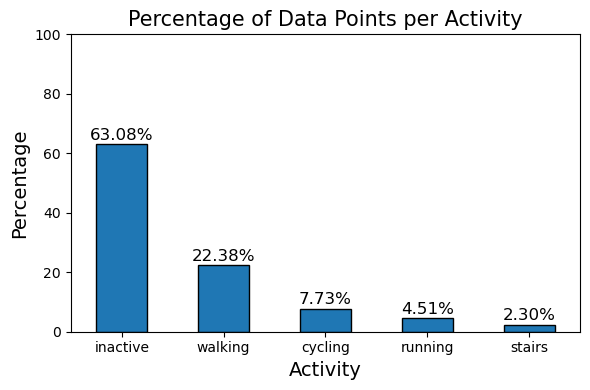

In [6]:
activity_counts = df['label'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
activity_counts.plot(kind='bar', edgecolor='black')

plt.title('Percentage of Data Points per Activity', fontsize=15)
plt.xlabel('Activity', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.ylim(0, 100)

for i, percentage in enumerate(activity_counts):
    plt.text(i, percentage + 1.5, f'{percentage:.2f}%', ha='center', fontsize=12)

plt.xticks(rotation=0)
plt.tight_layout()
# plt.savefig("../figures/label_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

How do the proportions of different activities vary among individual subjects in the dataset?

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


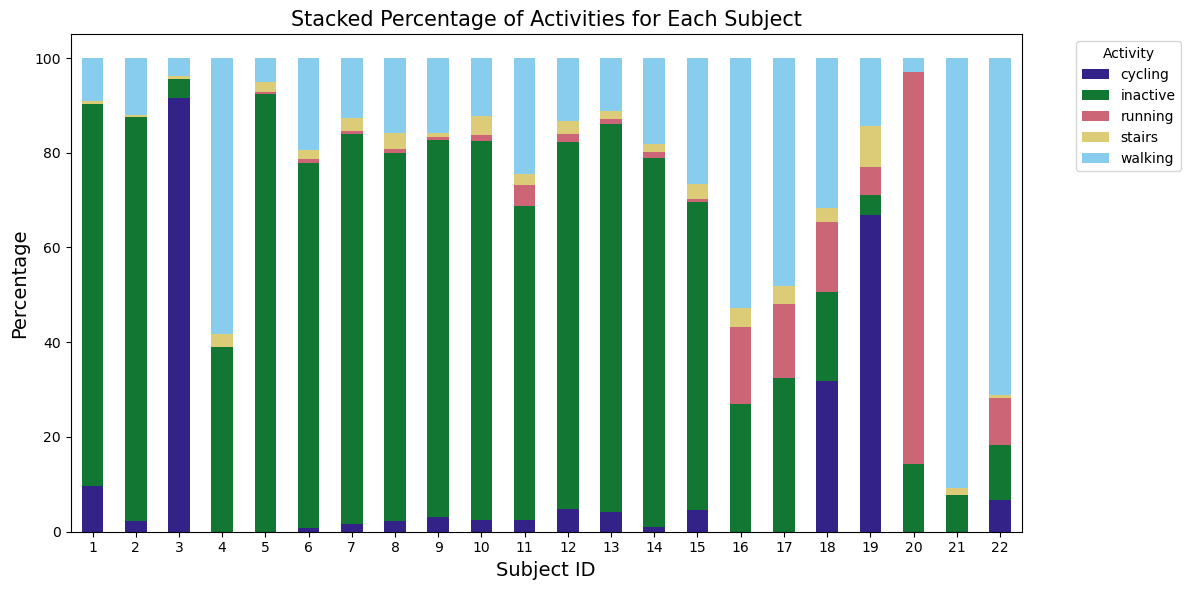

In [ ]:
activity_counts = df.groupby(['subject_id', 'label']).size().reset_index(name='count')
total_counts = df.groupby('subject_id').size().reset_index(name='total_count')
activity_percentage = pd.merge(activity_counts, total_counts, on='subject_id')
activity_percentage['percentage'] = (activity_percentage['count'] / activity_percentage['total_count']) * 100
activity_percentage = activity_percentage[['subject_id', 'label', 'percentage']]
pivot_df = activity_percentage.pivot(index='subject_id', columns='label', values='percentage').fillna(0)

activity_colors = {
    'walking': '#88CCEE',  # Light Blue
    'running': '#CC6677',  # Red
    'stairs': '#DDCC77',   # Yellow
    'inactive': '#117733', # Green
    'cycling': '#332288',  # Navy Blue
}

plt.figure(figsize=(12, 6))

pivot_df.plot(kind='bar', stacked=True, color=activity_colors, ax=plt.gca())

plt.title('Stacked Percentage of Activities for Each Subject', fontsize=15)
plt.xlabel('Subject ID', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.savefig("../figures/eda_stacked_percentage_activities.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

#### feature-target relationships for all features ($\times$ 1 random subject)

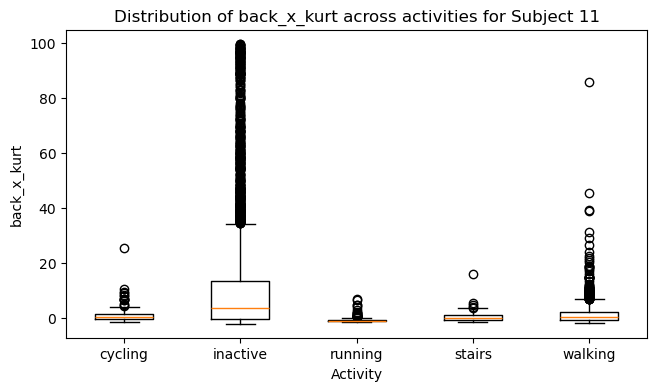

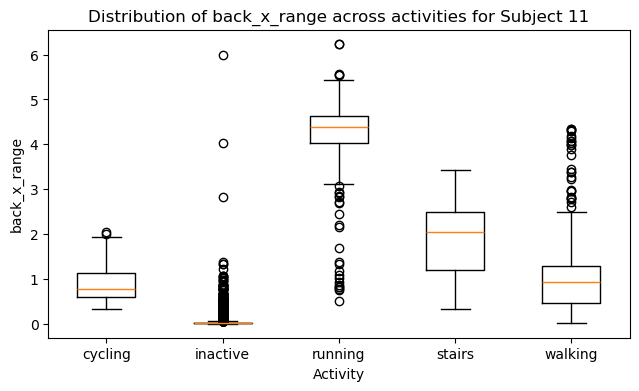

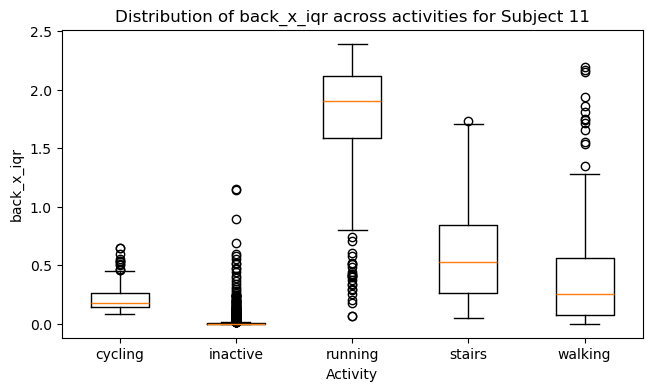

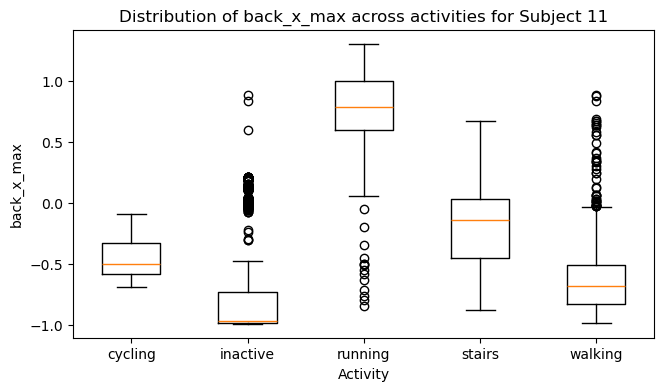

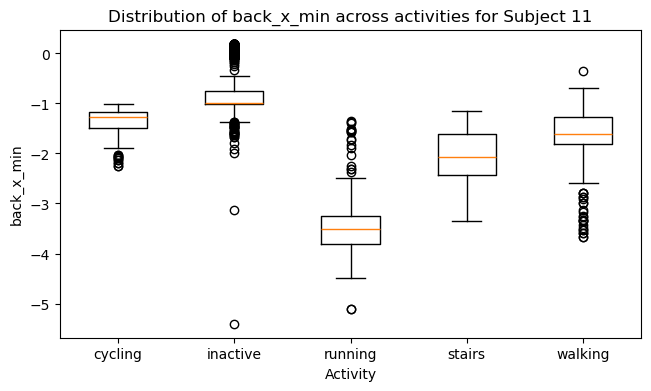

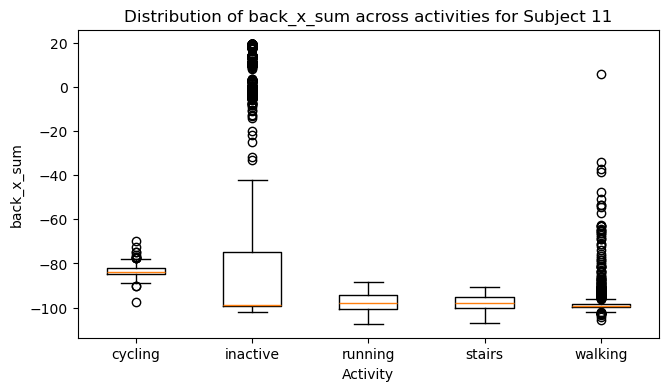

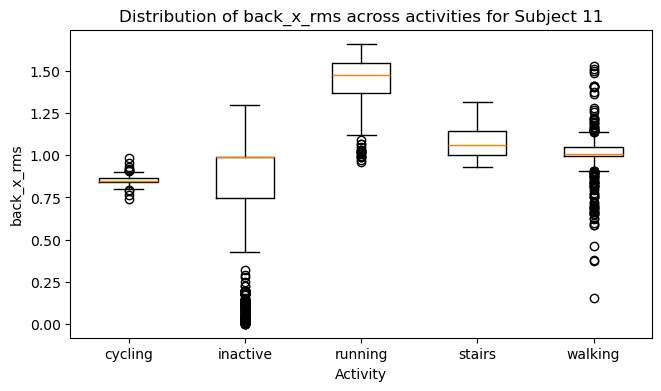

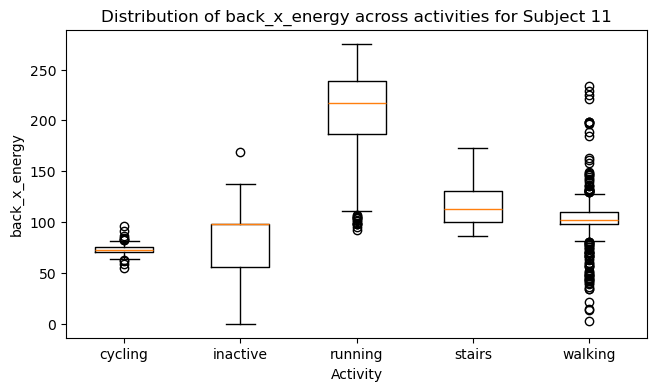

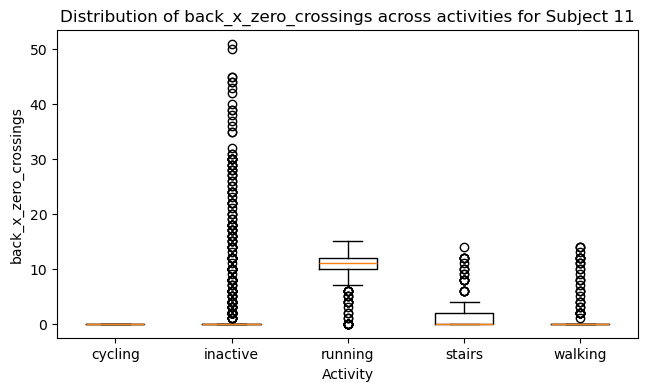

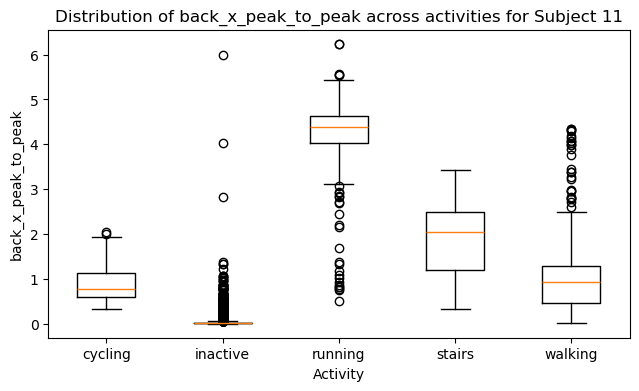

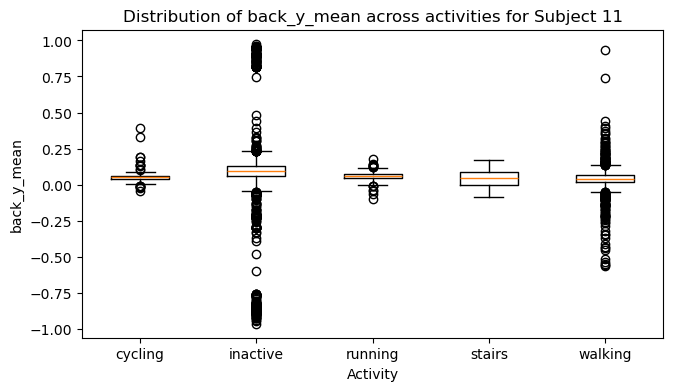

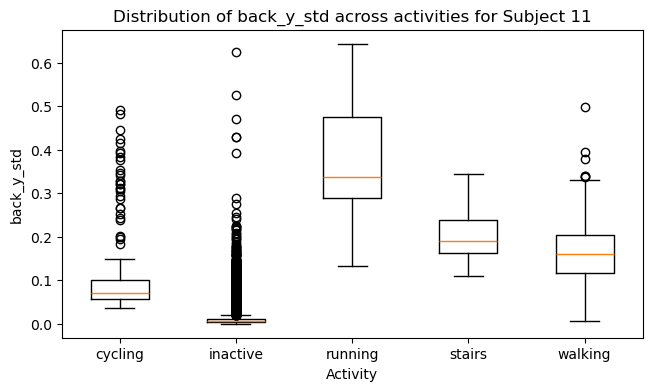

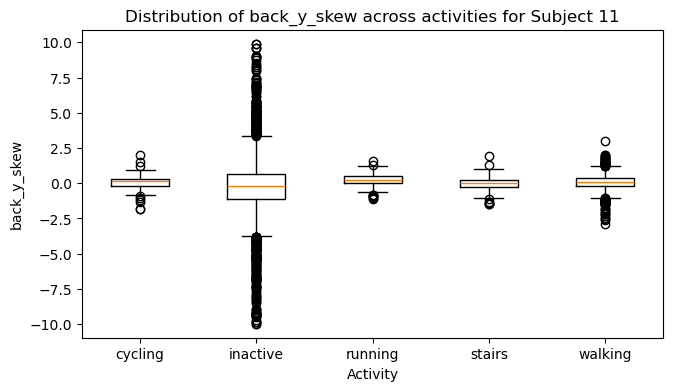

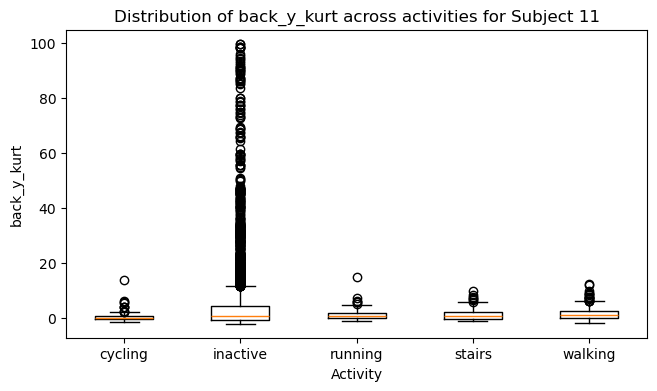

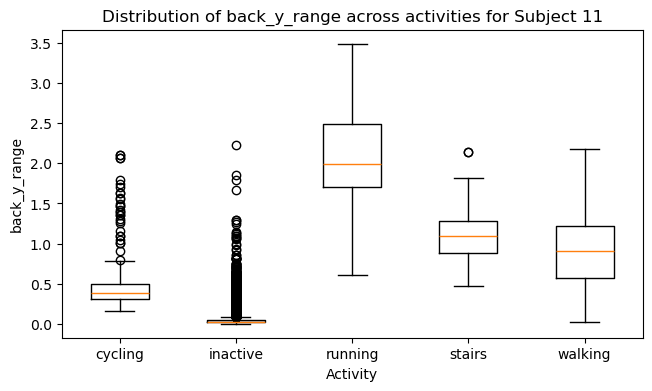

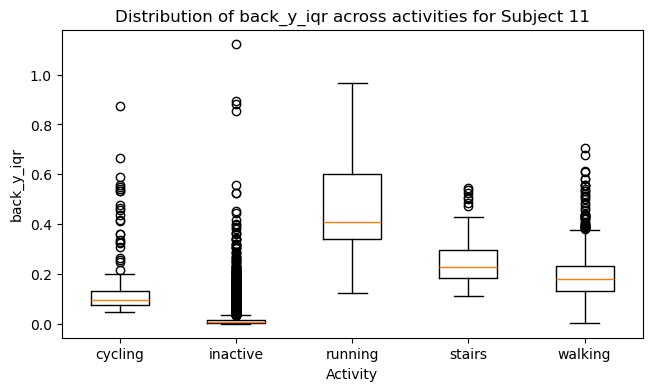

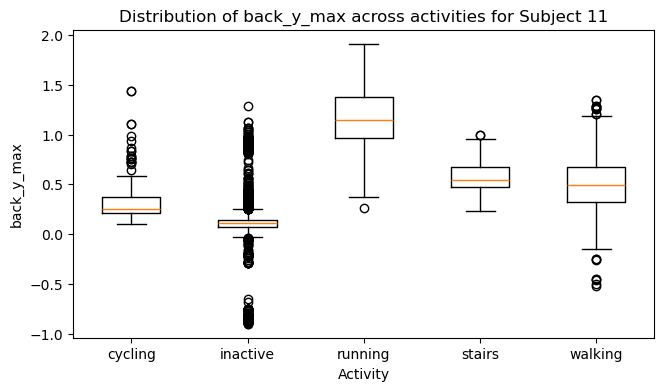

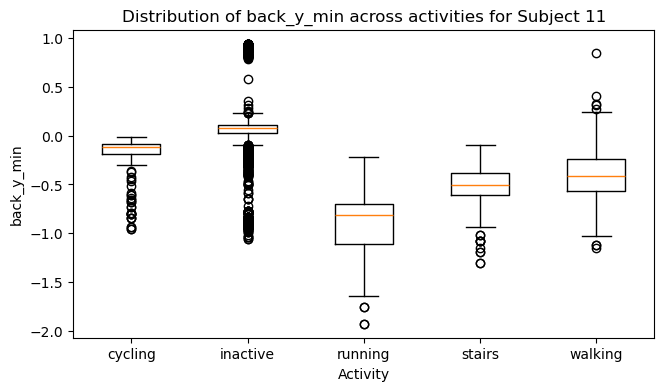

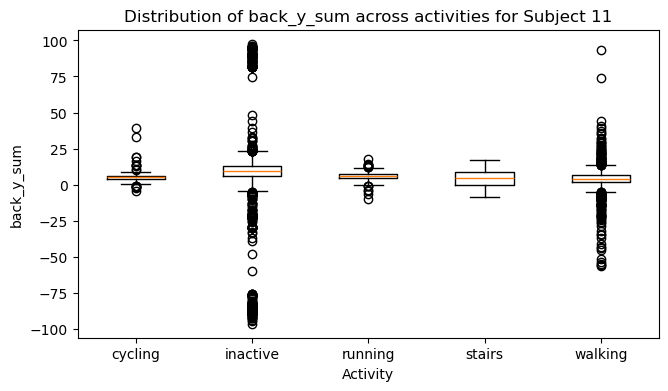

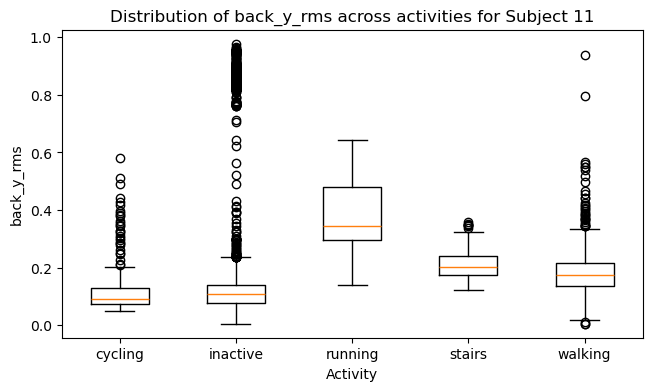

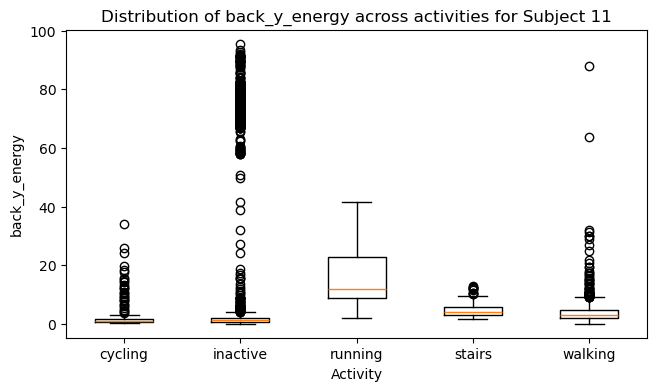

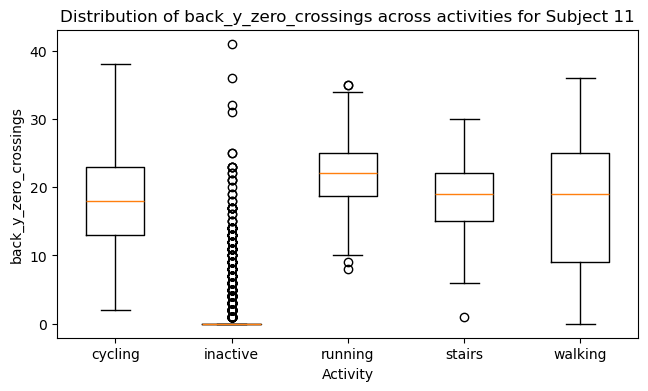

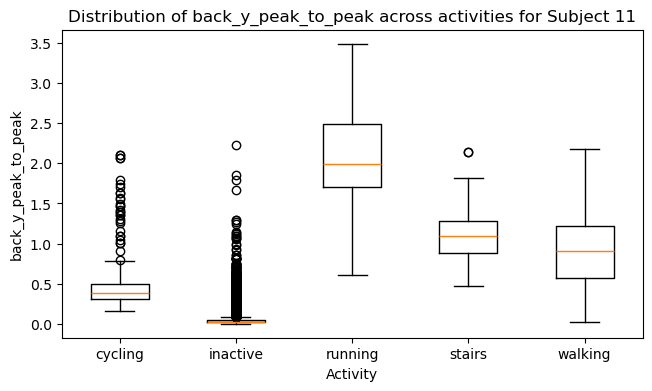

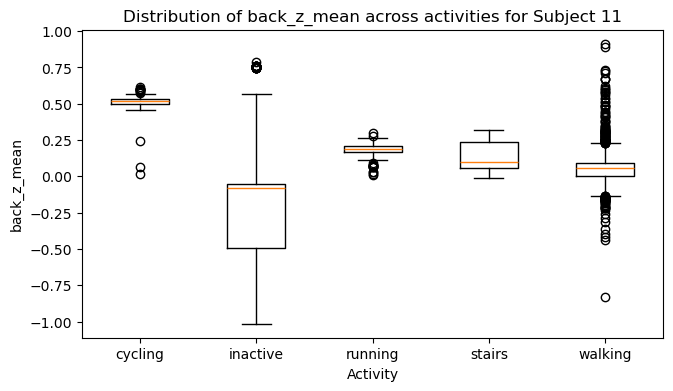

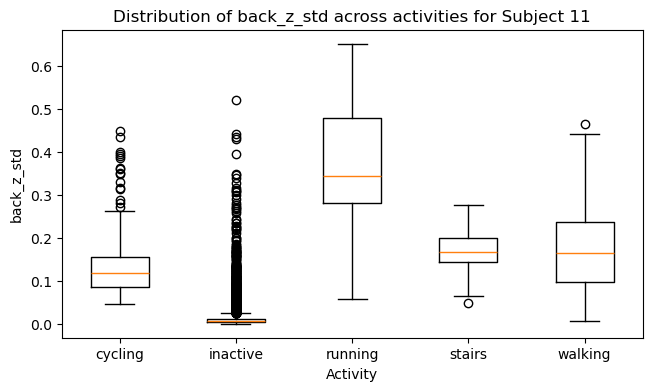

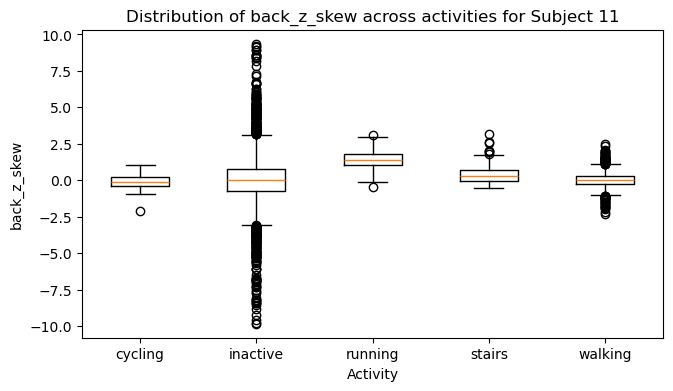

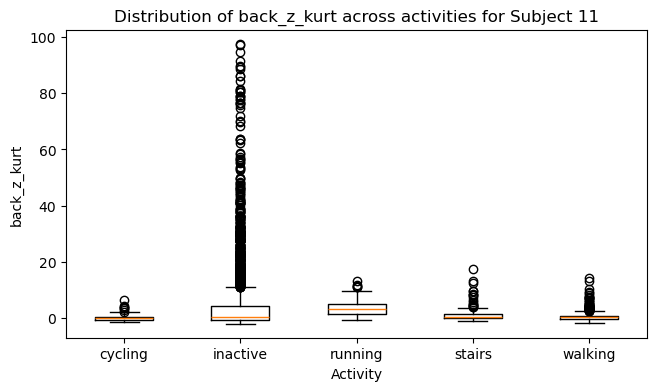

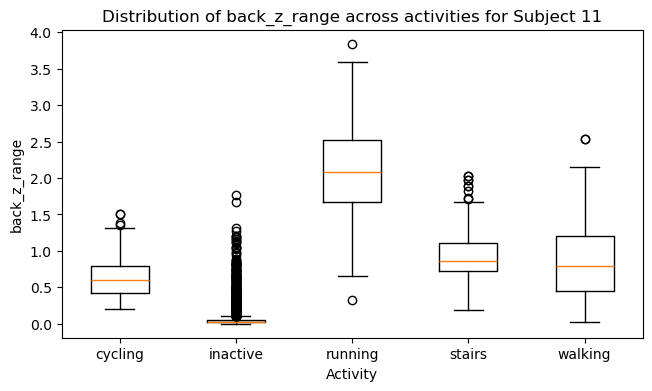

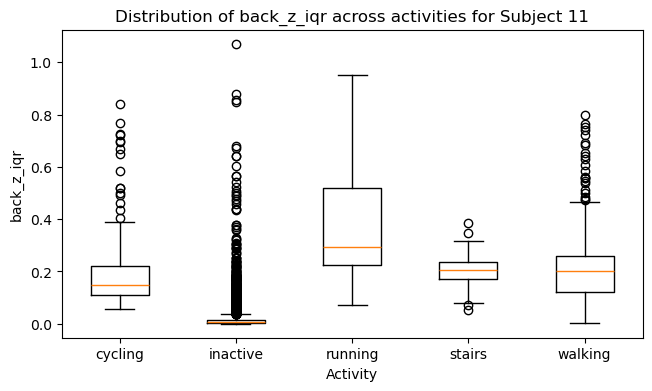

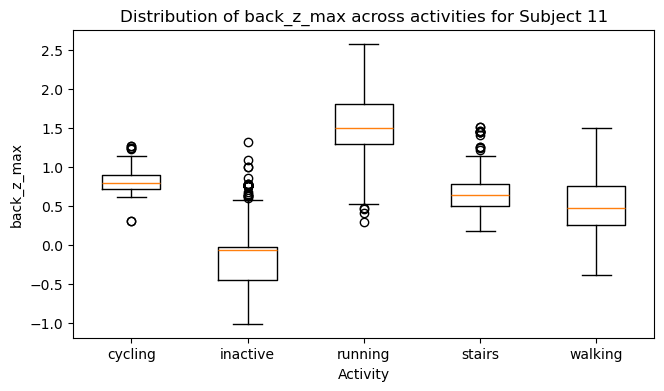

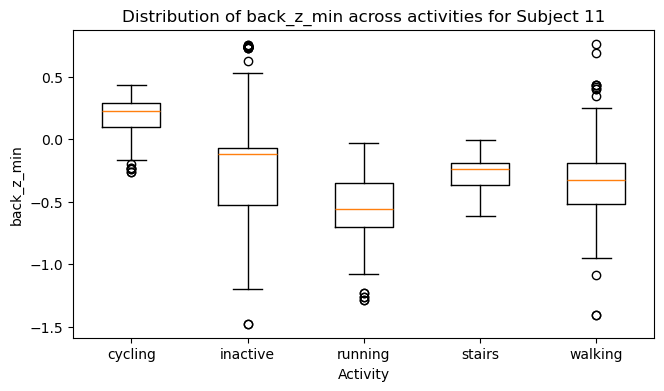

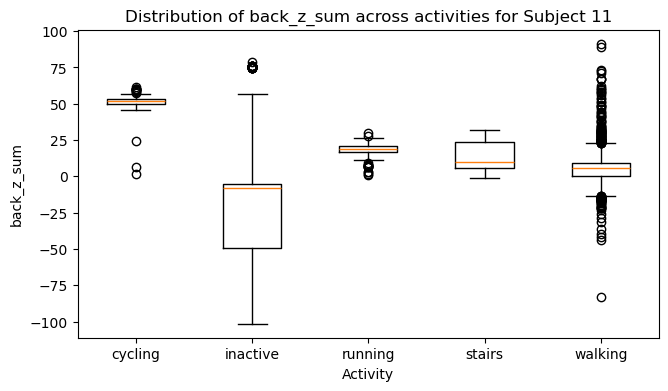

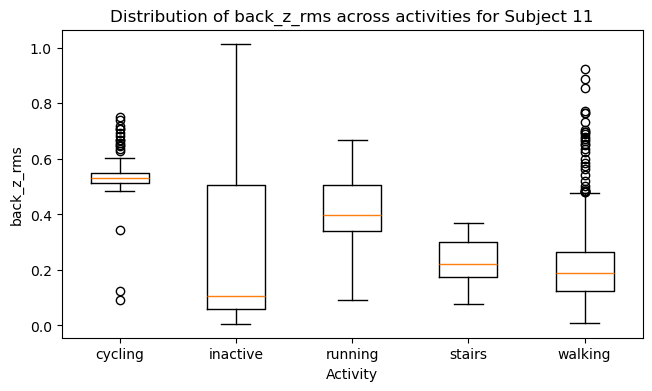

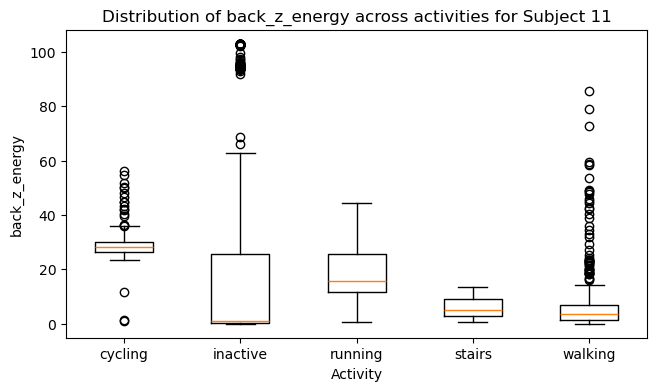

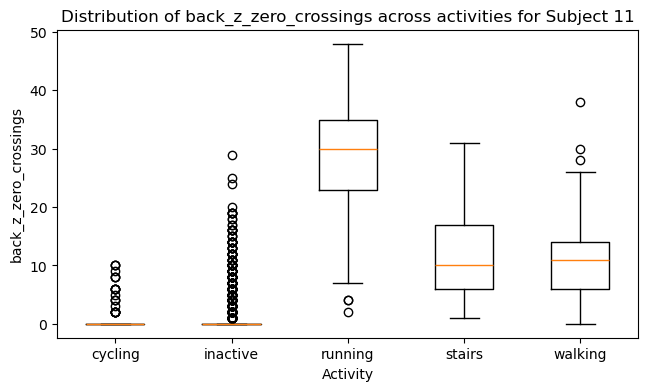

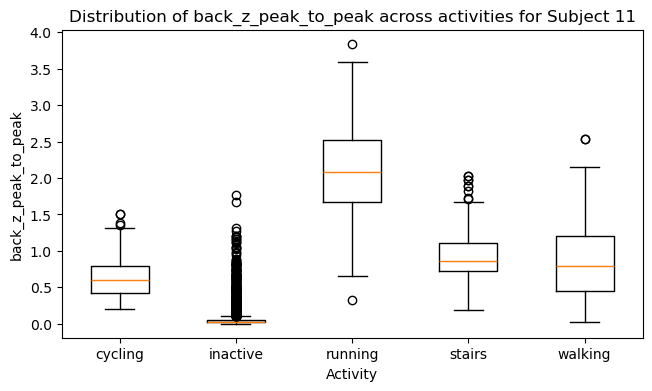

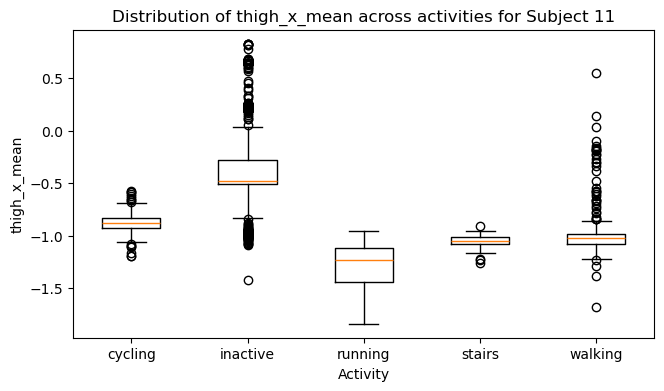

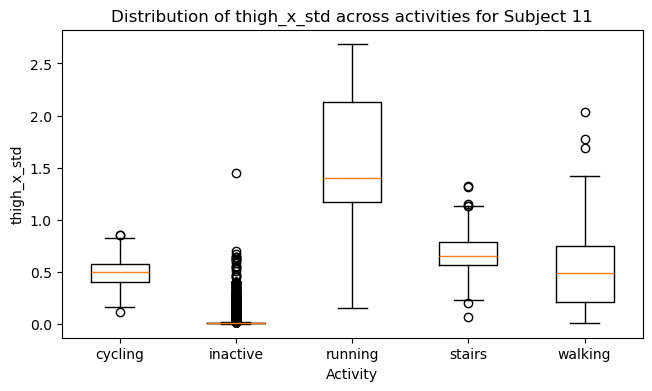

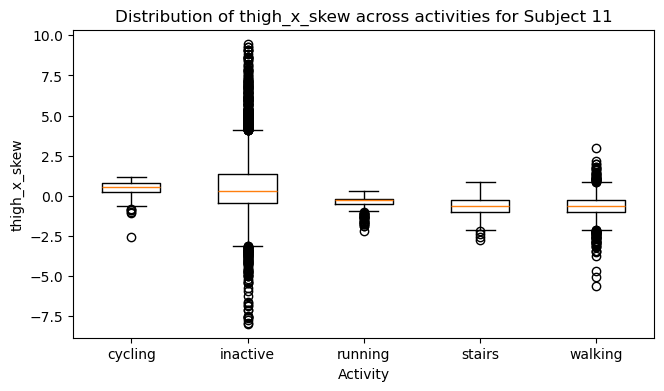

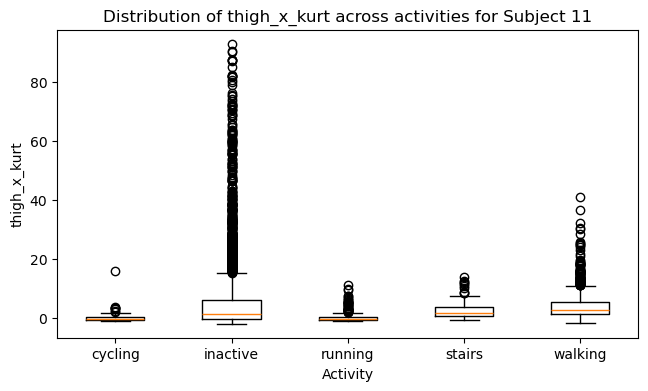

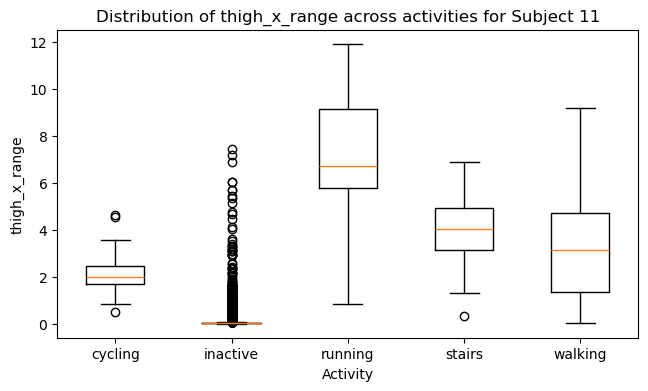

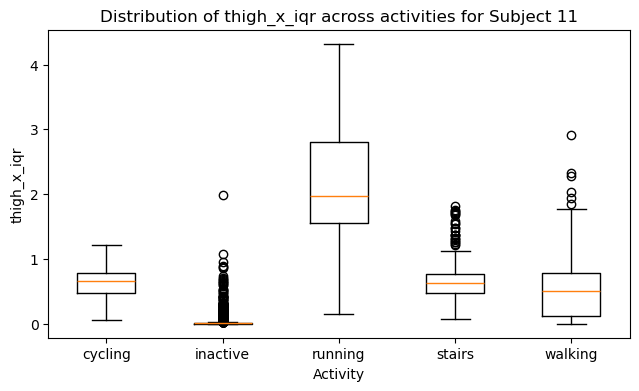

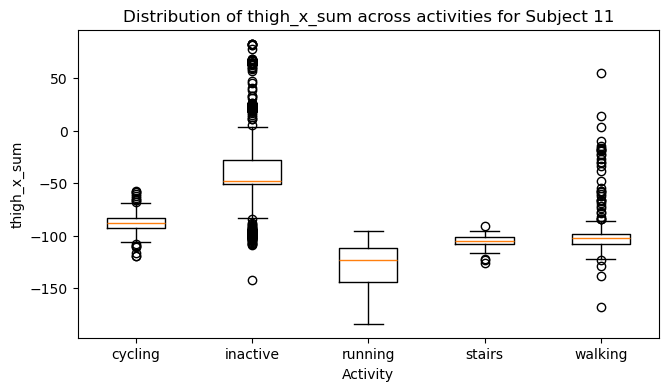

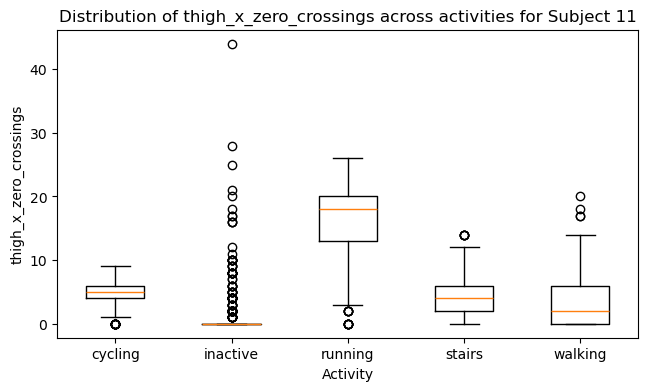

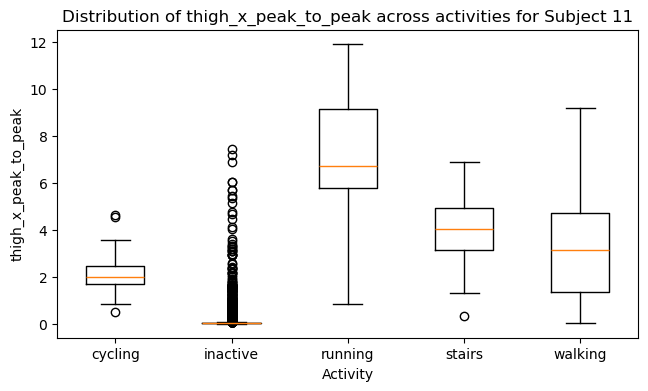

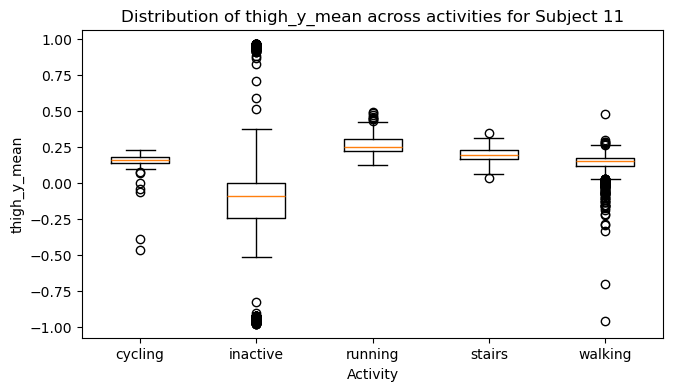

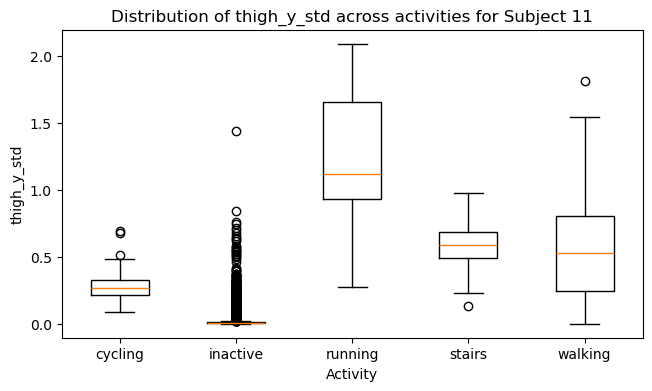

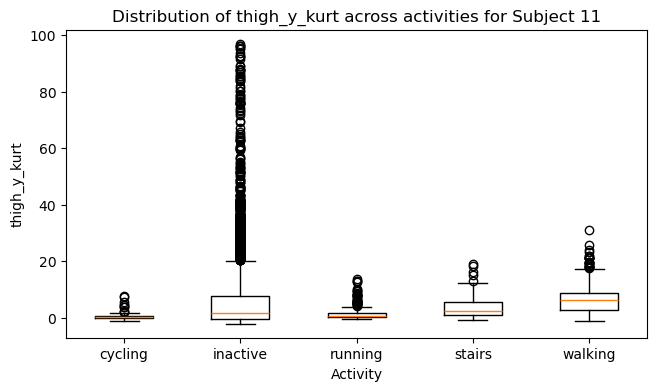

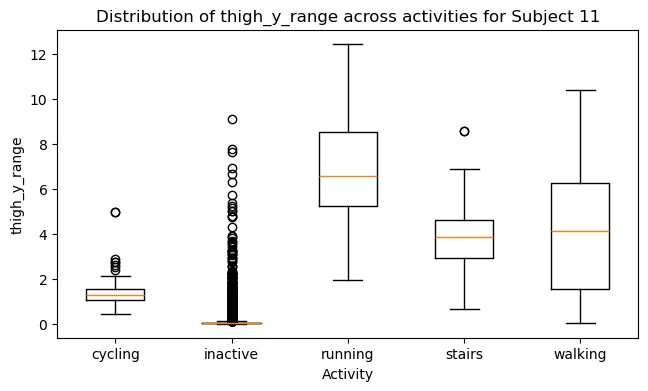

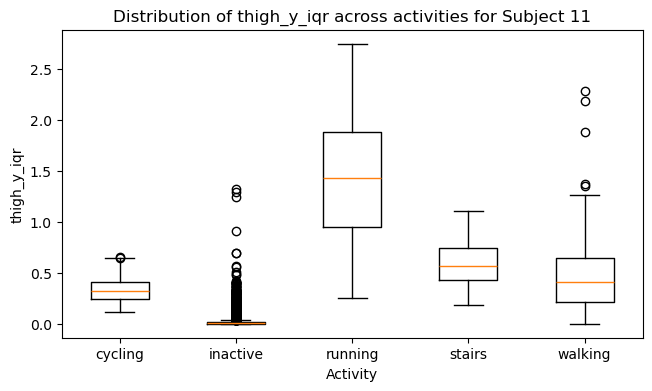

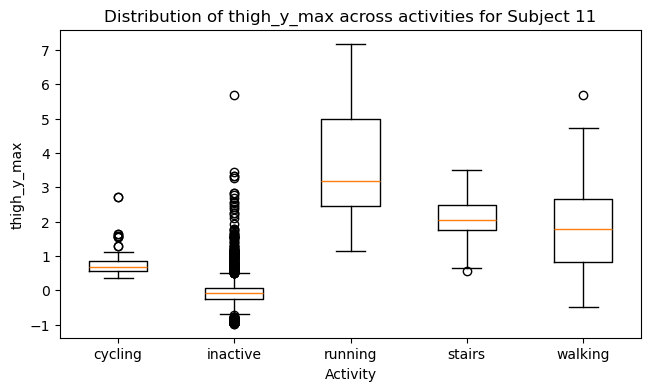

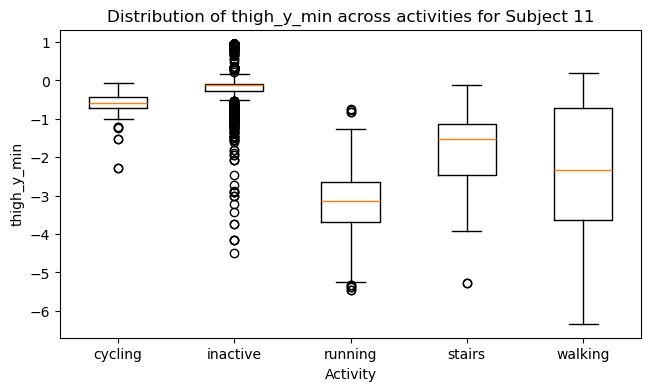

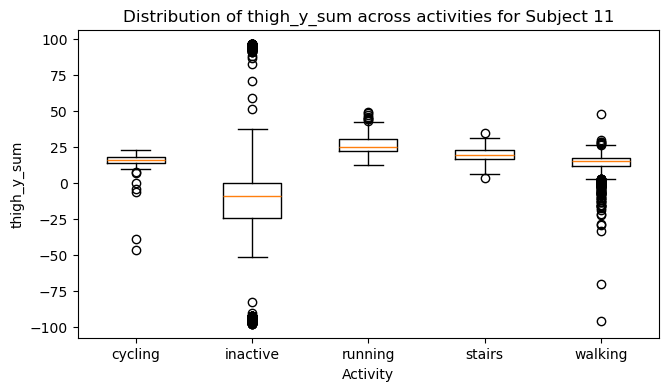

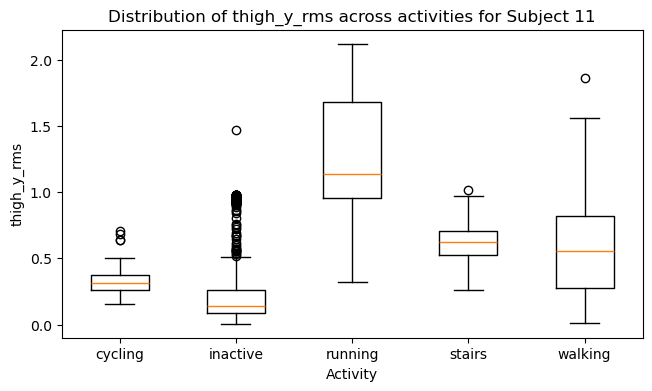

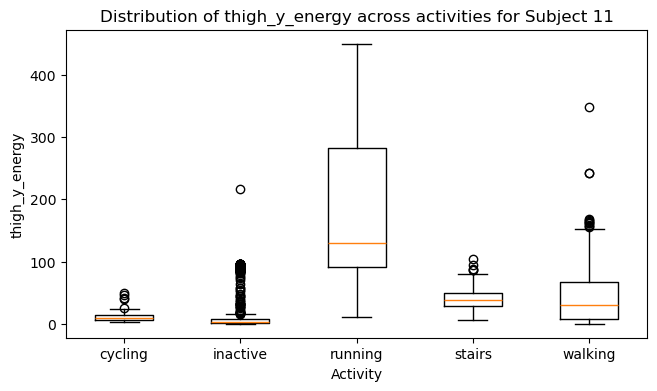

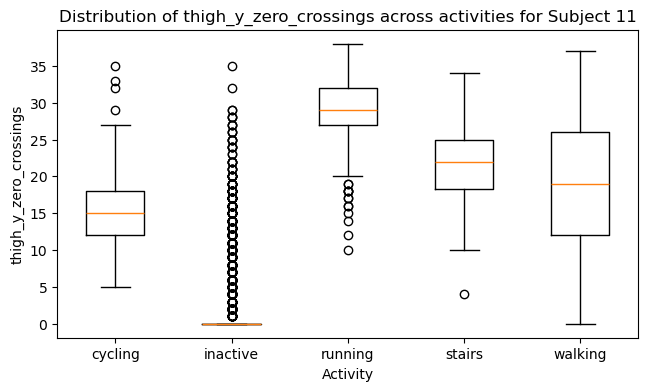

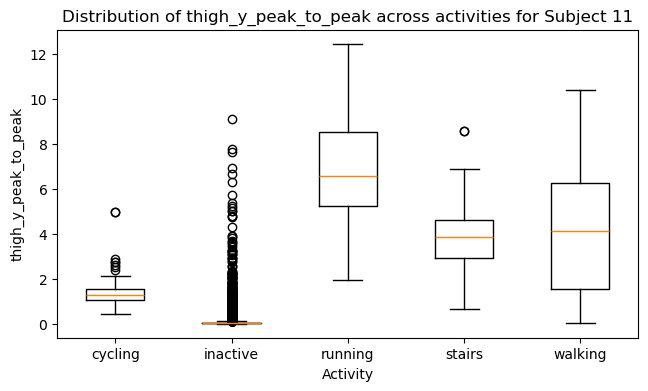

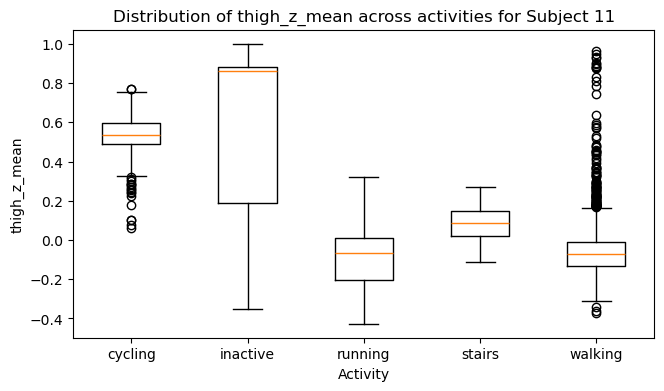

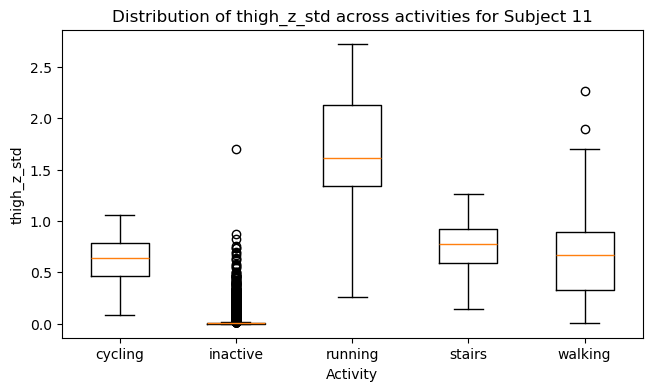

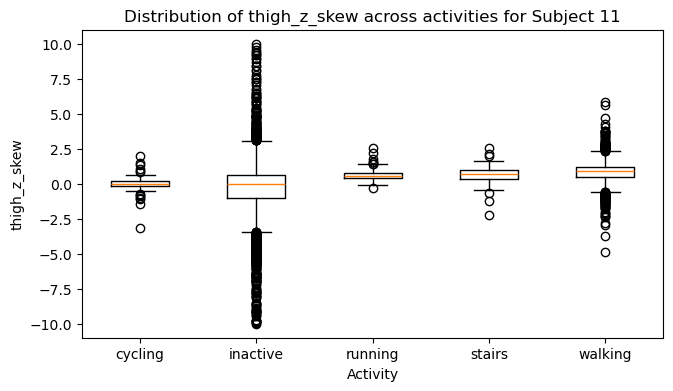

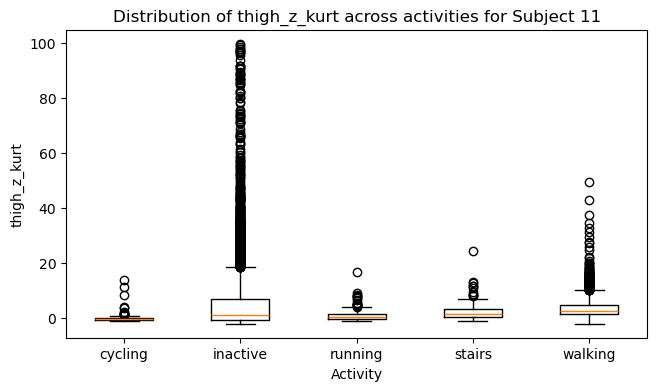

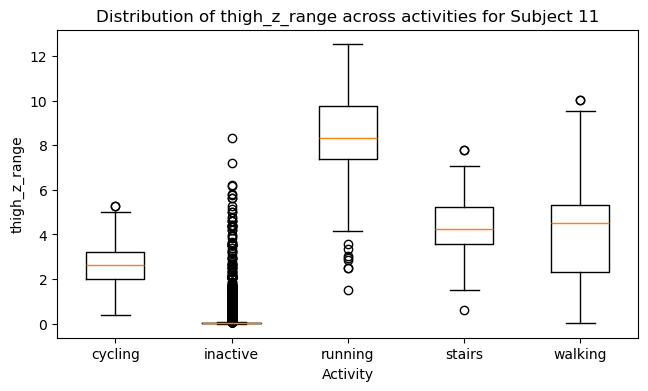

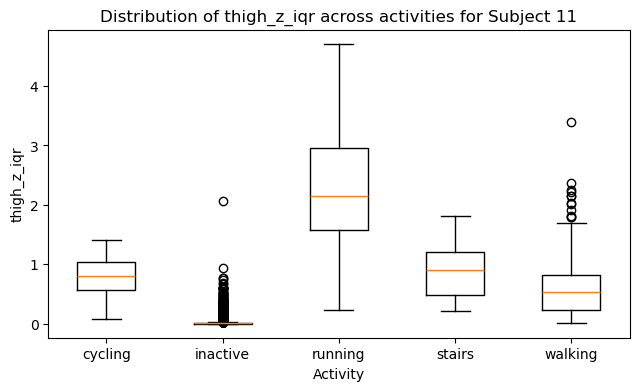

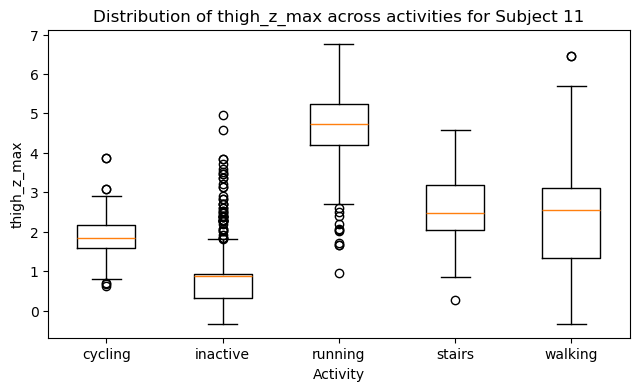

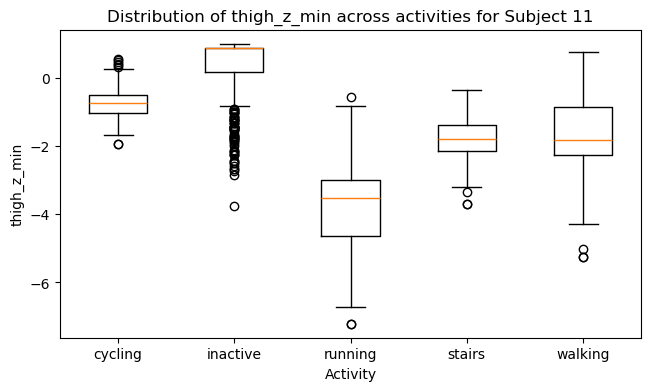

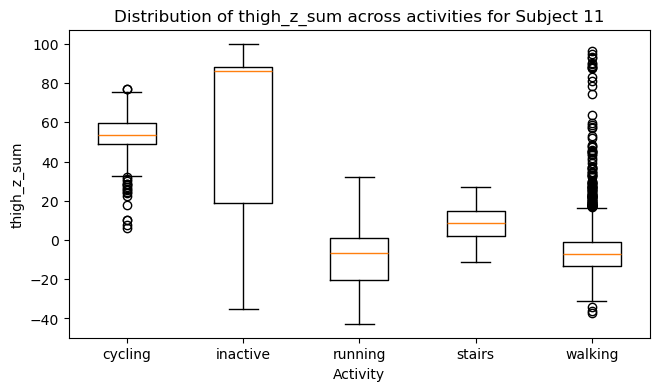

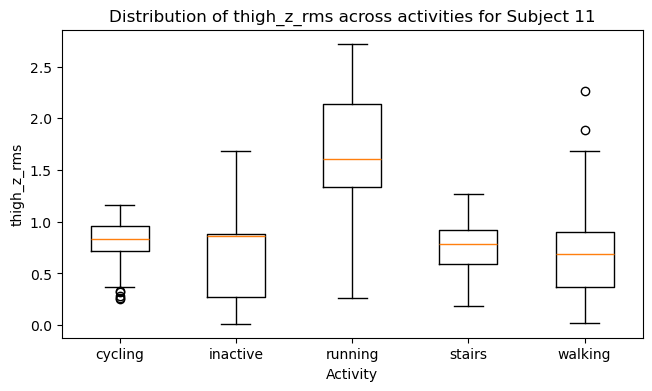

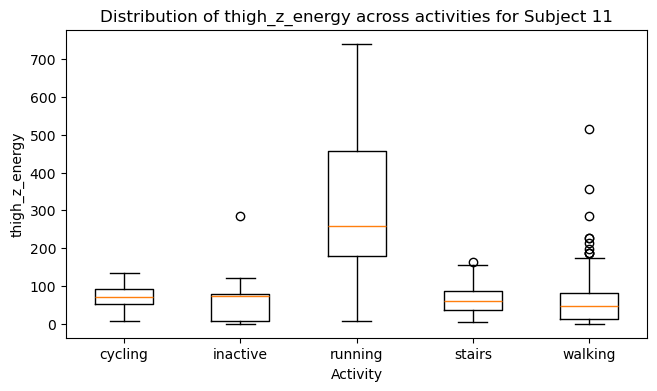

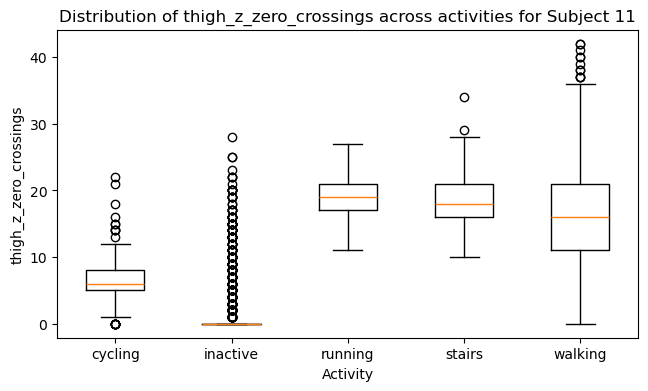

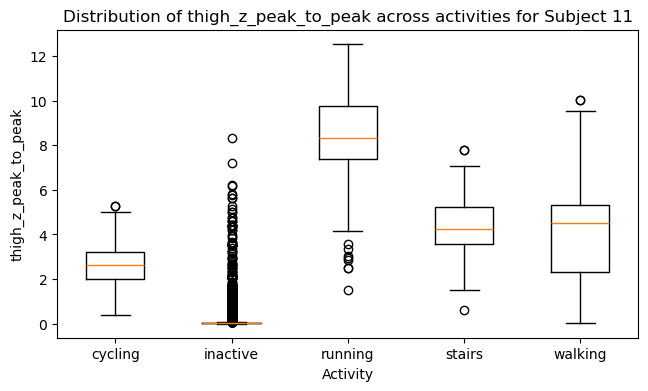

In [79]:
subj_id = 11

for feat in df.columns[4:]:
    data = df[df['subject_id'] == subj_id]
    grouped_data = [data[data['label'] == label][feat] for label in np.unique(df['label'])]

    plt.figure(figsize=(7.5, 4))
    plt.boxplot(grouped_data, labels=np.unique(df['label']))
    plt.title(f'Distribution of {feat} across activities for Subject {subj_id}')
    plt.xlabel('Activity')
    plt.ylabel(f'{feat}')
    plt.show()

#### feature-target relationships for `back_x_std` feature ($\times$ 5 random subjects)

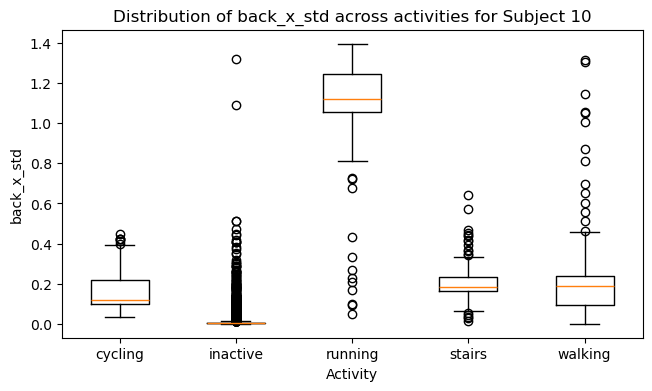

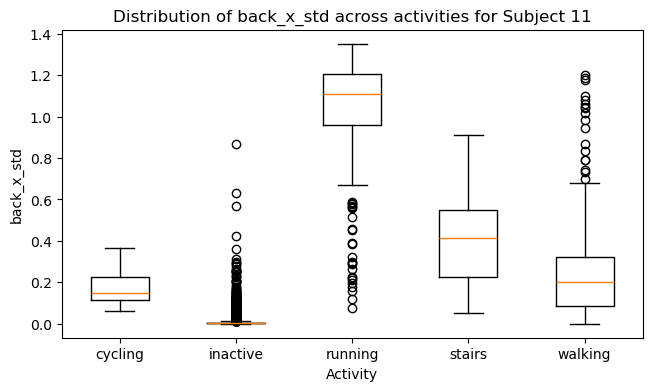

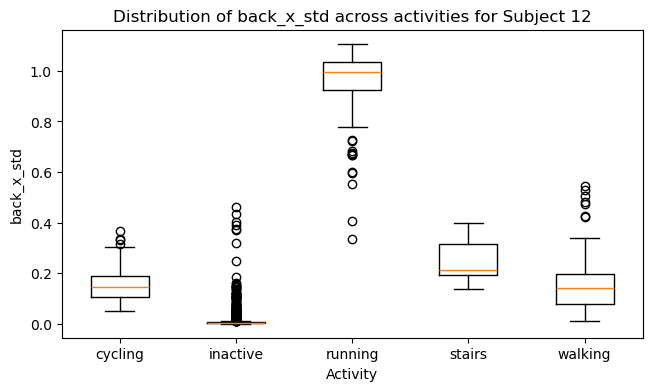

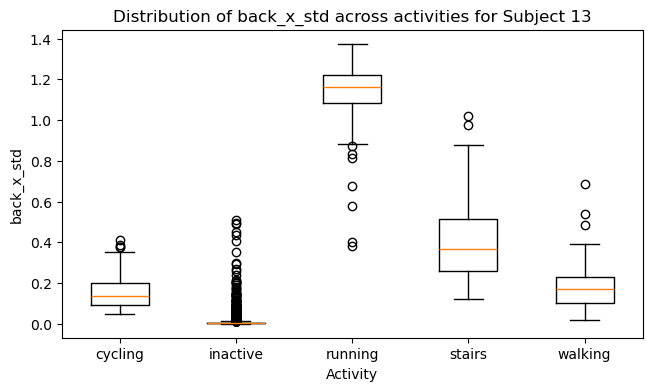

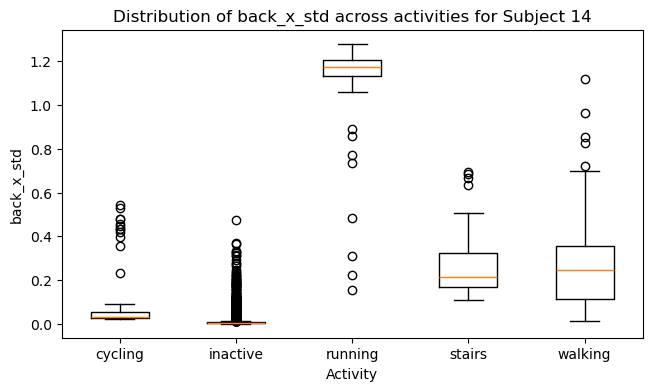

In [ ]:
feature_name = 'back_x_std'

for subj_id in np.arange(22)[10:15]:
    data = df[df['subject_id'] == subj_id]
    grouped_data = [data[data['label'] == label][feature_name] for label in np.unique(df['label'])]

    plt.figure(figsize=(7.5, 4))
    plt.boxplot(grouped_data, labels=np.unique(df['label']))
    plt.title(f'Distribution of {feature_name} across activities for Subject {subj_id}')
    plt.xlabel('Activity')
    plt.ylabel(f'{feature_name}')
    plt.show()

insight: standard deviation tends to be very small for `inactive` and very high for `running`

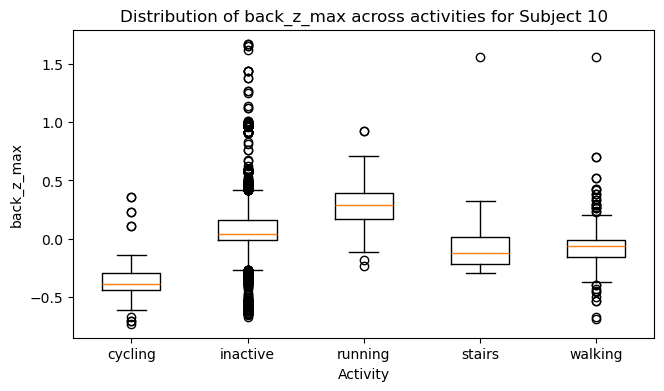

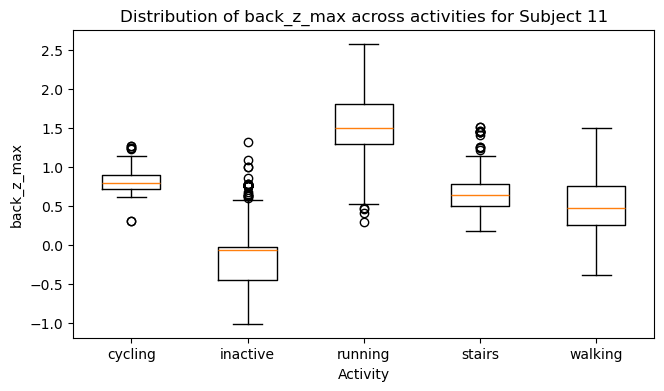

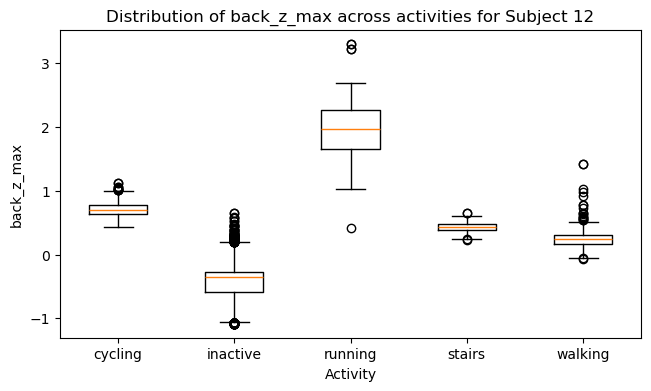

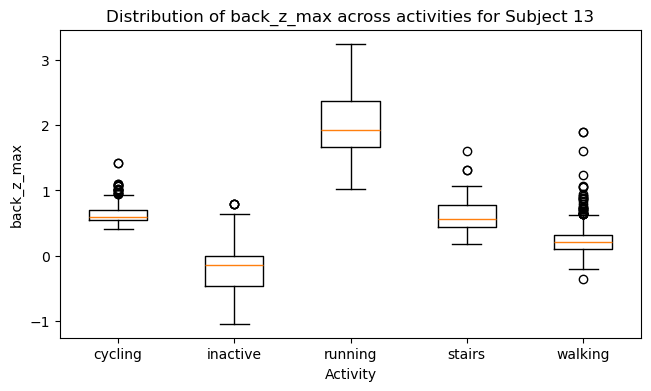

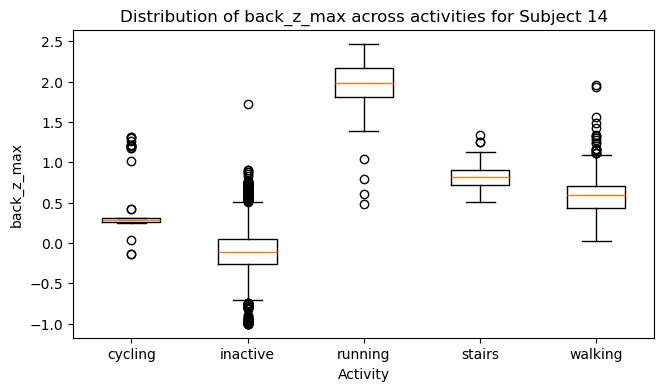

In [78]:
feature_name = 'back_z_max'

for subj_id in np.arange(22)[10:15]:
    data = df[df['subject_id'] == subj_id]
    grouped_data = [data[data['label'] == label][feature_name] for label in np.unique(df['label'])]

    plt.figure(figsize=(7.5, 4))
    plt.boxplot(grouped_data, labels=np.unique(df['label']))
    plt.title(f'Distribution of {feature_name} across activities for Subject {subj_id}')
    plt.xlabel('Activity')
    plt.ylabel(f'{feature_name}')
    plt.show()

#### correlated features

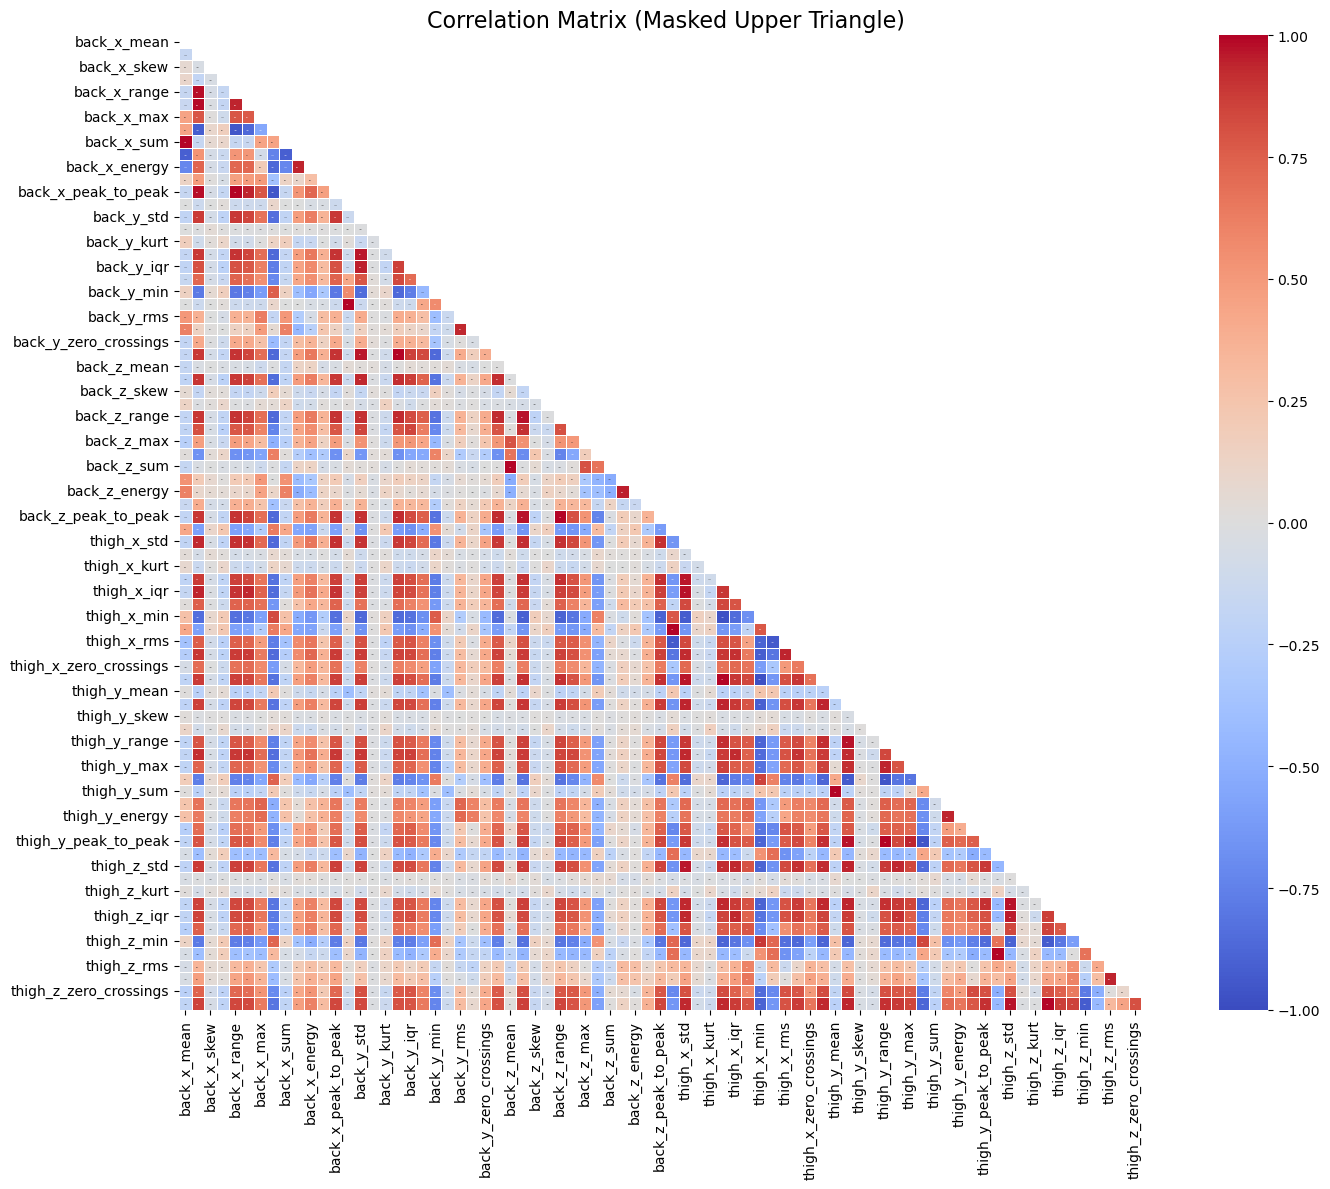

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

correlation_matrix = df[df.columns[4:]].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(15, 12))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", mask=mask, cmap="coolwarm", cbar=True,
            square=True, linewidths=0.5, annot_kws={"size": 0}, vmax=1, vmin=-1)

plt.title("Correlation Matrix (Masked Upper Triangle)", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
correlation_threshold = 0.9      # Set a correlation threshold

correlated_features = set()
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[j]
            correlated_features.add(colname)

# Remove highly correlated features
df_reduced = df.drop(columns=correlated_features)

print(f"Removed {len(correlated_features)} correlated features:")
print(correlated_features)

Removed 41 correlated features:
{'thigh_z_min', 'thigh_x_peak_to_peak', 'thigh_y_max', 'thigh_y_peak_to_peak', 'thigh_x_energy', 'back_x_range', 'back_y_range', 'back_x_iqr', 'back_x_rms', 'back_z_iqr', 'back_x_sum', 'thigh_z_sum', 'thigh_x_range', 'back_y_sum', 'back_z_energy', 'thigh_y_min', 'back_z_peak_to_peak', 'thigh_z_std', 'back_y_iqr', 'thigh_z_range', 'thigh_z_peak_to_peak', 'back_z_range', 'thigh_x_iqr', 'thigh_y_iqr', 'back_x_min', 'thigh_z_energy', 'back_x_energy', 'thigh_y_range', 'thigh_x_min', 'back_x_peak_to_peak', 'thigh_y_sum', 'back_y_energy', 'back_z_std', 'thigh_x_rms', 'thigh_x_sum', 'thigh_y_std', 'thigh_y_energy', 'back_y_peak_to_peak', 'thigh_z_iqr', 'back_z_sum', 'thigh_x_std'}


In [6]:
df_reduced.head()

subject_id  window_start  window_end     label  back_x_mean  back_x_std  \
0           1             0          99   walking    -0.975977    0.137209   
1           1            50         149   walking    -0.989042    0.006359   
2           1           100         199   walking    -0.989415    0.008734   
3           1           150         249   walking    -1.001666    0.089329   
4           1           200         299  inactive    -0.994725    0.093550   

   back_x_skew  back_x_kurt  back_x_max  back_x_zero_crossings  ...  \
0     0.553341    16.817742   -0.355071                      0  ...   
1    -0.099840    -0.245041   -0.976182                      0  ...   
2    -0.688959     1.025675   -0.968303                      0  ...   
3    -1.872917     6.356036   -0.802925                      0  ...   
4    -1.814825     5.336248   -0.802925                      0  ...   

   thigh_y_skew  thigh_y_kurt  thigh_y_rms  thigh_y_zero_crossings  \
0     -4.686721     32.951507     0.130952                      19   
1      0.987363      0.877986     0.057976                       0   
2      2.364330      5.971838     0.069254                       0   
3      1.249045      5.896466     0.162145                       4   
4      0.589514      2.207475     0.183160                      14   

   thigh_z_mean  thigh_z_skew  thigh_z_kurt  thigh_z_max  thigh_z_rms  \
0     -0.272417      4.569072     30.871566     0.709439     0.304457   
1     -0.296721     -0.098355     -0.948189    -0.278594     0.296813   
2     -0.300218     -1.503124      3.112805    -0.277551     0.300466   
3     -0.296553      0.976161      6.404589     0.553839     0.346667   
4     -0.235579      0.067203      1.885965     0.553839     0.315772   

   thigh_z_zero_crossings  
0                       1  
1                       0  
2                       0  
3                       4  
4                      10  

[5 rows x 41 columns]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

correlation_matrix = df_reduced[df_reduced.columns[4:]].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(15, 12))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", mask=mask, cmap="coolwarm", cbar=True,
            square=True, linewidths=0.5, annot_kws={"size": 6}, vmax=1, vmin=-1)

plt.title("Correlation Matrix (Masked Upper Triangle)", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# df_reduced.to_csv('data/final_data.csv')